# Business Case :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_csv('players_20.csv')

In [4]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',105)
data1

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

## Domain Analysis :

## Basic Checks

In [7]:
data1.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [8]:
data1.shape

(18278, 104)

In [9]:
data1.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [10]:
list(data1.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [11]:
data1.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [12]:
data1.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [14]:
data1.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

## Droping Unwanted Columns
- ### Fifa ID, Player URL, Long Name, Potential, Body Type, Realface, Loaned From, Jersery Number
- ### Joined, Contract Until, National Jersey Number

In [16]:
data2 = data1.copy()

In [17]:
data2.drop(['sofifa_id',"player_url","long_name","real_face","potential","body_type",
           "loaned_from","joined","contract_valid_until","team_jersey_number","nation_jersey_number"], axis=1, inplace=True)

In [18]:
data2.head()

short_name  age         dob  height_cm  weight_kg nationality  \
0           L. Messi   32  1987-06-24        170         72   Argentina   
1  Cristiano Ronaldo   34  1985-02-05        187         83    Portugal   
2          Neymar Jr   27  1992-02-05        175         68      Brazil   
3           J. Oblak   26  1993-01-07        188         87    Slovenia   
4          E. Hazard   28  1991-01-07        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint-Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   
4    High/Medium         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

  nation_position  pace  shooting  passing  dribbling  defending  physic  \
0             NaN  87.0      92.0     92.0       96.0       39.0    66.0   
1              LS  90.0      93.0     82.0       89.0       35.0    78.0   
2              LW  91.0      85.0     87.0       95.0       32.0    58.0   
3              GK   NaN       NaN      NaN        NaN        NaN     NaN   
4              LF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        NaN          NaN         NaN          NaN       NaN             NaN   
1        NaN          NaN         NaN          NaN       NaN             NaN   
2        NaN          NaN         NaN          NaN       NaN             NaN   
3       87.0         92.0        78.0         89.0      52.0            90.0   
4        NaN          NaN         NaN          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                  13   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87 

In [19]:
# numerical columns
numerical_cols = data2.select_dtypes(include=['int64', 'float64']).columns

# categorical columns
categorical_cols = data2.select_dtypes(include=['object']).columns


In [20]:
numerical_cols

Index(['age', 'height_cm', 'weight_kg', 'overall', 'value_eur', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_s

In [21]:
categorical_cols

Index(['short_name', 'dob', 'nationality', 'club', 'player_positions',
       'preferred_foot', 'work_rate', 'player_tags', 'team_position',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [22]:
data2.isnull().sum()

short_name       0
age              0
dob              0
height_cm        0
weight_kg        0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 93, dtype: int64

In [23]:
# To define the position-related columns
position_cols = ['rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
                 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','ls','st','rs','lw','lf'	,'cf']


In [24]:
# place missing values with a placeholder
data2[position_cols] = data2[position_cols].fillna('Unknown')

In [25]:
data2.isnull().sum()
# Null values treated.

short_name    0
age           0
dob           0
height_cm     0
weight_kg     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 93, dtype: int64

In [26]:
# Treating the objects cols.

def convert_position_rating(value):
    try:
        if isinstance(value, str):  # to check dtype of the data
            if value.lower() == 'unknown':
                return np.nan  # To return '0' if there is null value
            elif '+' in value:
                base, boost = value.split('+')
                return int(base) + int(boost)  # To add the numbers after converting to int
            else:
                return int(value)
        elif isinstance(value, (int, float)):  # Already numeric
            return value
        else:
            return np.nan 
    except:
        return np.nan



In [27]:
# paste it for the required cols alone.
for col in position_cols:
    data2[col] = data2[col].apply(convert_position_rating) # applying this to every object cols present.

In [28]:
data2.head()

short_name  age         dob  height_cm  weight_kg nationality  \
0           L. Messi   32  1987-06-24        170         72   Argentina   
1  Cristiano Ronaldo   34  1985-02-05        187         83    Portugal   
2          Neymar Jr   27  1992-02-05        175         68      Brazil   
3           J. Oblak   26  1993-01-07        188         87    Slovenia   
4          E. Hazard   28  1991-01-07        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint-Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   
4    High/Medium         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

  nation_position  pace  shooting  passing  dribbling  defending  physic  \
0             NaN  87.0      92.0     92.0       96.0       39.0    66.0   
1              LS  90.0      93.0     82.0       89.0       35.0    78.0   
2              LW  91.0      85.0     87.0       95.0       32.0    58.0   
3              GK   NaN       NaN      NaN        NaN        NaN     NaN   
4              LF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        NaN          NaN         NaN          NaN       NaN             NaN   
1        NaN          NaN         NaN          NaN       NaN             NaN   
2        NaN          NaN         NaN          NaN       NaN             NaN   
3       87.0         92.0        78.0         89.0      52.0            90.0   
4        NaN          NaN         NaN          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                  13   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87 

In [29]:
data2.dtypes

short_name     object
age             int64
dob            object
height_cm       int64
weight_kg       int64
               ...   
lb            float64
lcb           float64
cb            float64
rcb           float64
rb            float64
Length: 93, dtype: object

In [30]:
data2[position_cols] = data2[position_cols].fillna(0).astype(int)

In [31]:
# Converting float columns to int :
data2[position_cols] = data2[position_cols].astype(int)

In [32]:
# Now display null values count for all columns

pd.set_option('display.max_rows', None)

data2.isnull().sum()


short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
nation_position               17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                 

In [33]:
# Total Number of Null values
data2.isnull().sum().sum()

155849

# UNIVARIATE ANALYSIS : 

In [35]:
# GROUPING THE SKILL SECTION ALONE :
attacking = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys'
]
goalkeeping = [
    'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes'
]
defending = [
    'defending_marking', 'defending_standing_tackle',
    'defending_sliding_tackle'
]
mentality = [
    'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure'
]
power = [
    'power_shot_power', 'power_jumping', 'power_stamina',
    'power_strength', 'power_long_shots'
]
movement = [
    'movement_acceleration', 'movement_sprint_speed',
    'movement_agility', 'movement_reactions', 'movement_balance'
]
skill = [
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
    'skill_long_passing', 'skill_ball_control'
]

# Every column is grouped into a category so that, category will be easy to segreagte to the model.


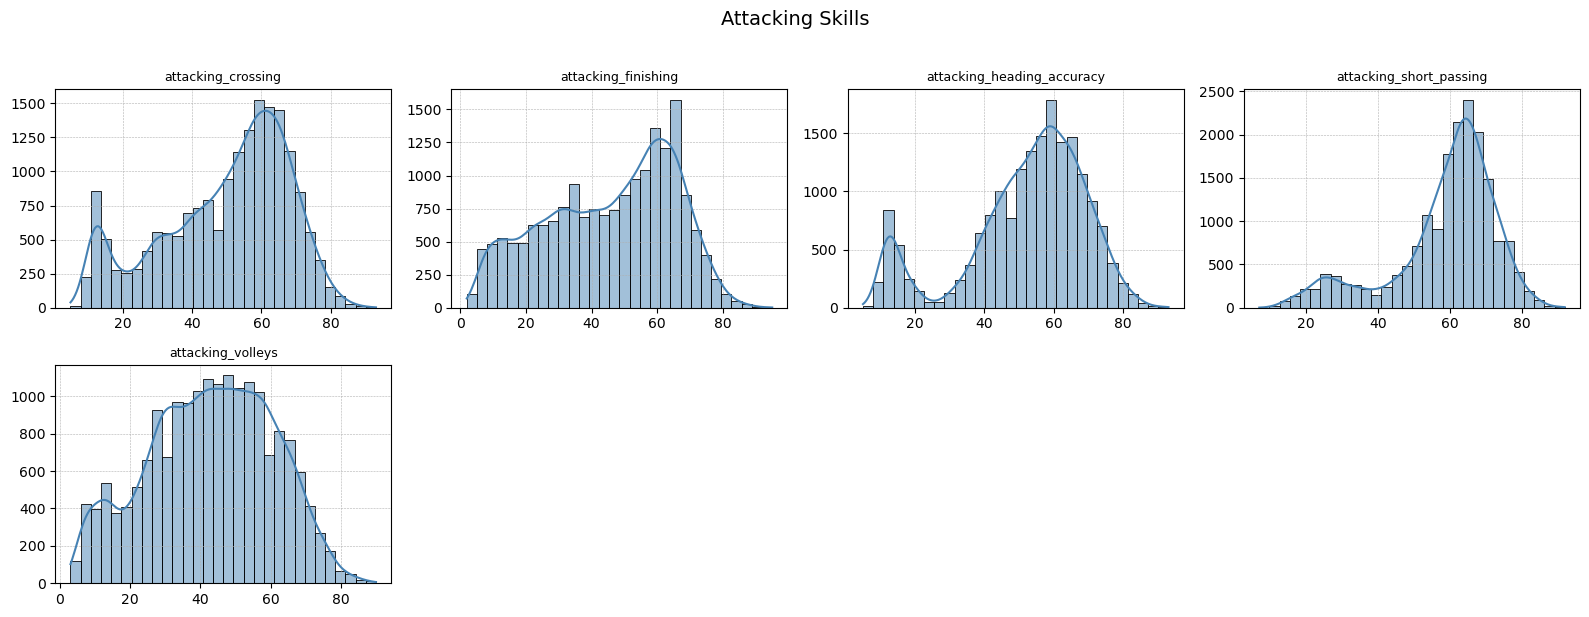

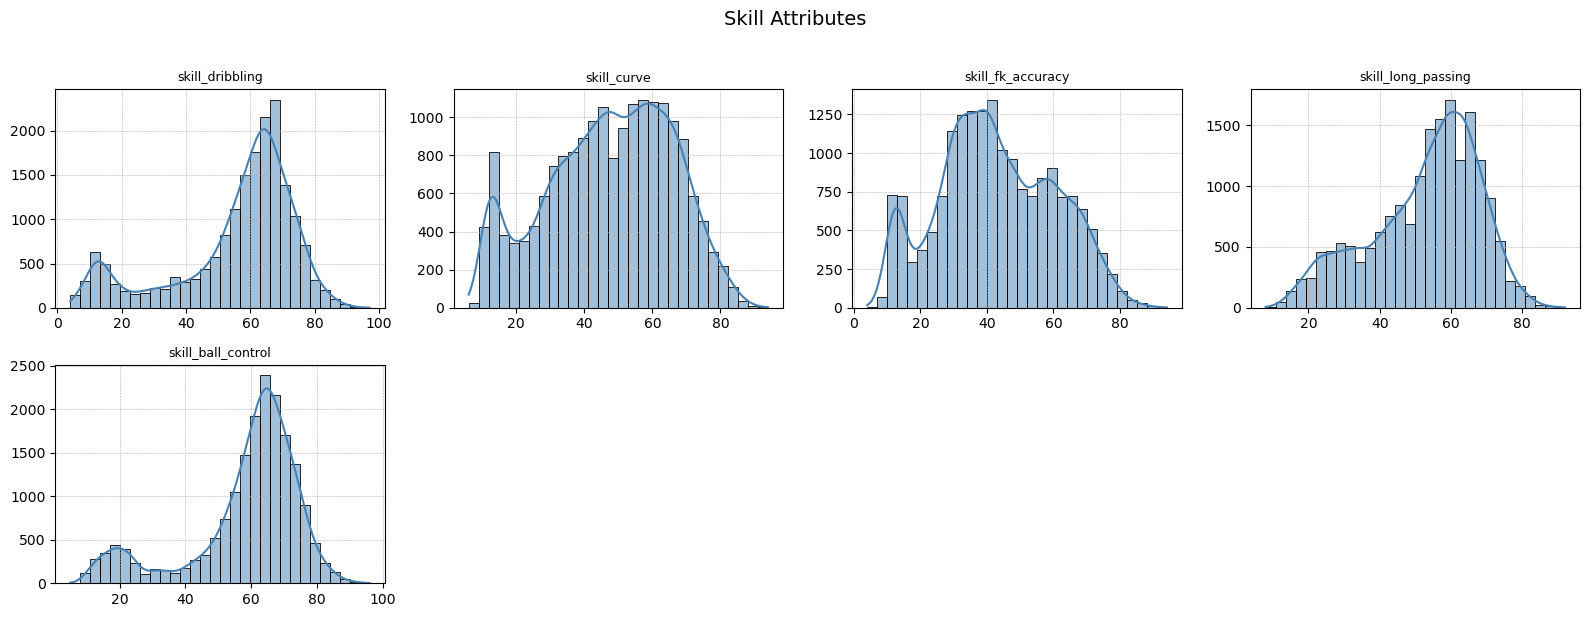

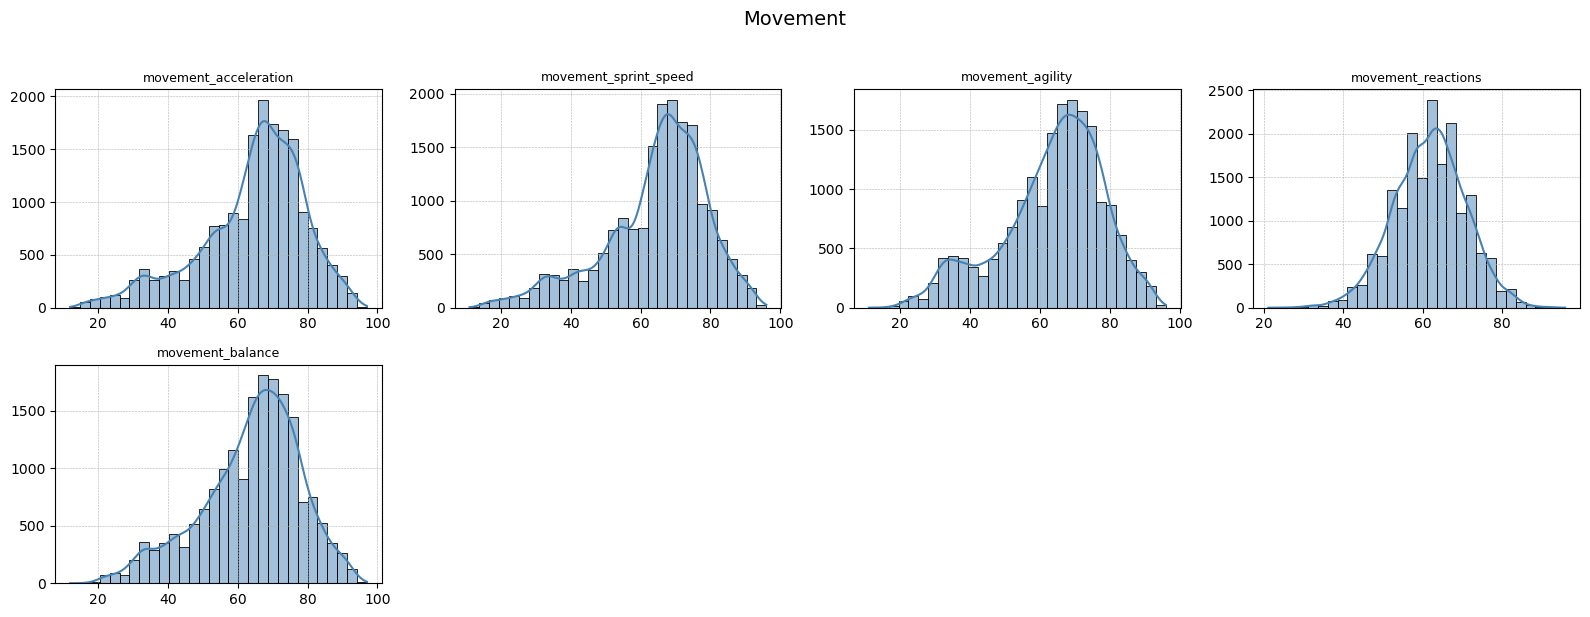

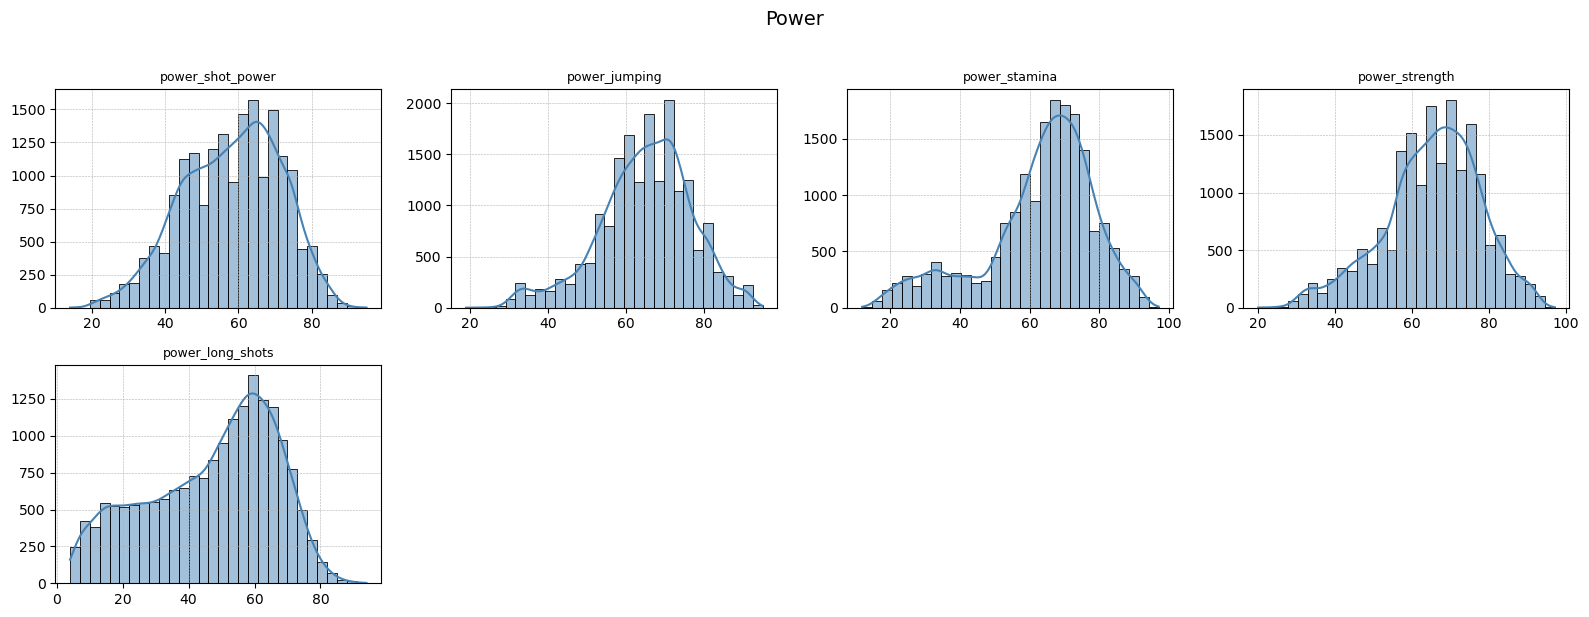

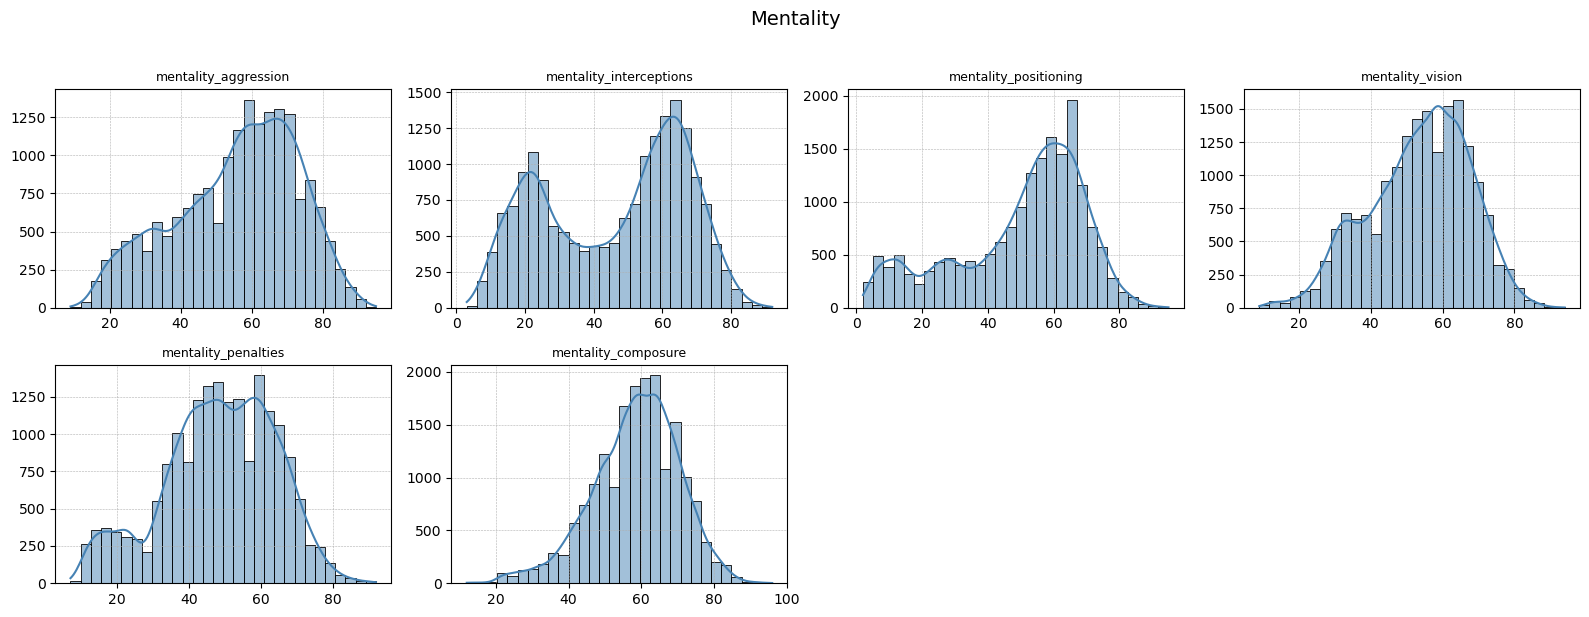

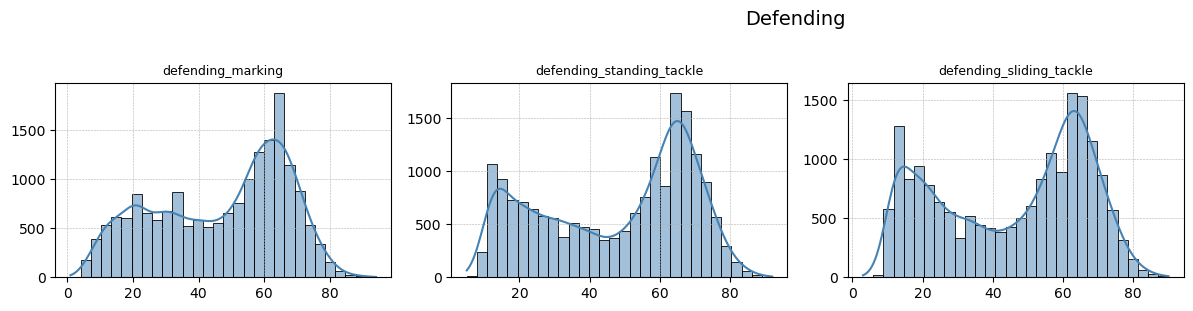

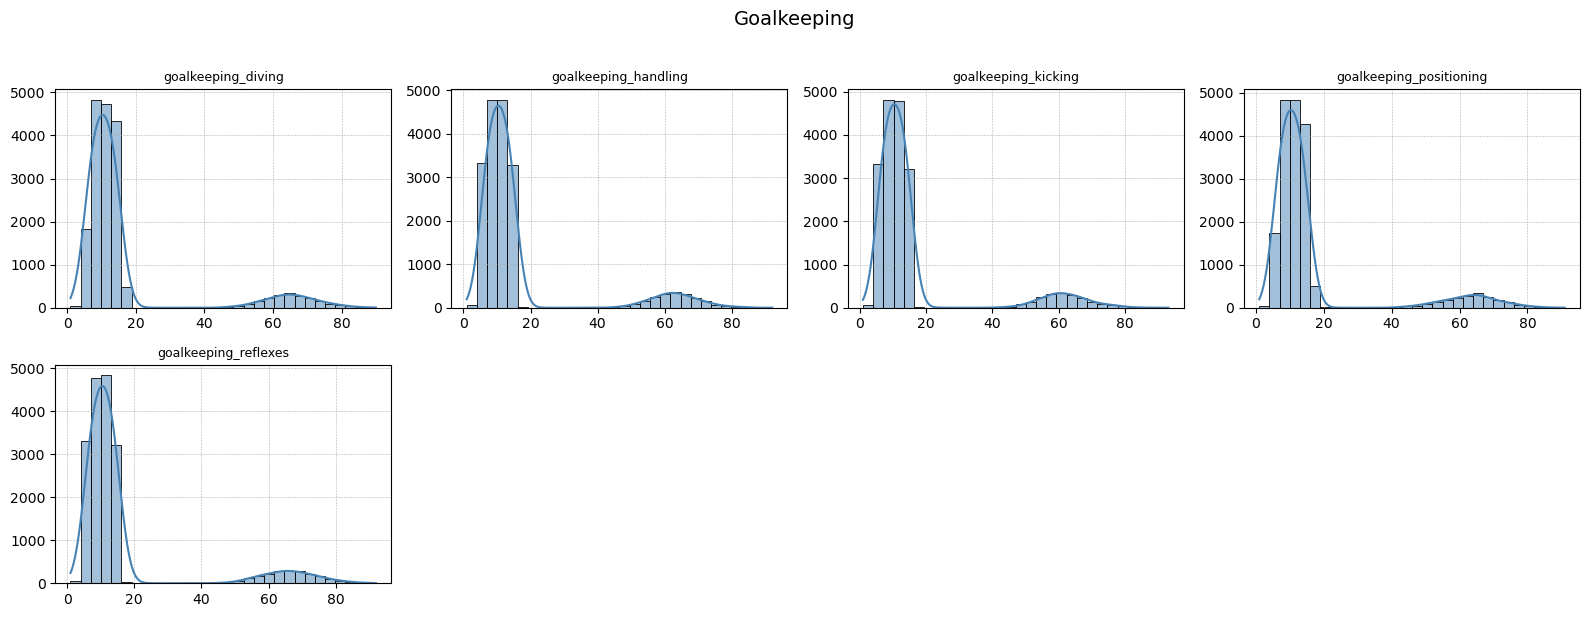

In [36]:


# Grouped skill categories
skill_groups = {
    'Attacking Skills': attacking,
    'Skill Attributes': skill,
    'Movement': movement,
    'Power': power,
    'Mentality': mentality,
    'Defending': defending,
    'Goalkeeping': goalkeeping
}

plots_per_row = 4
plot_width = 4
plot_height = 3

# Plot each skill group in compact form
for group_name, cols in skill_groups.items():
    rows = (len(cols) + plots_per_row - 1) // plots_per_row
    plt.figure(figsize=(plot_width * plots_per_row, plot_height * rows))
    
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, plots_per_row, i)
        sns.histplot(data2[col], kde=True, bins=30, color='steelblue')
        plt.title(col, fontsize=9)
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True, linestyle='--', linewidth=0.4)
    
    plt.suptitle(group_name, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


# INSIGHTS :
-
-
-

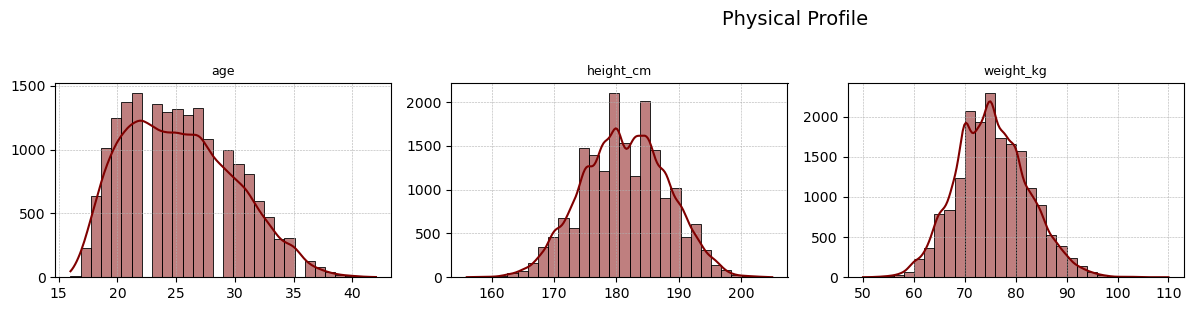

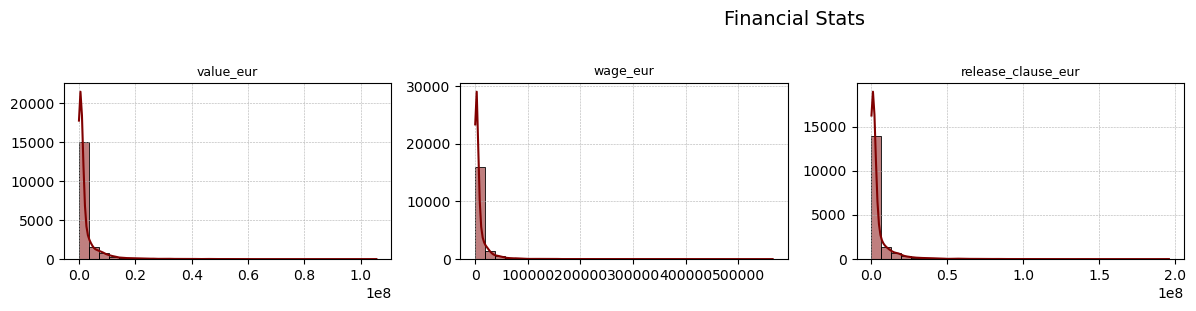

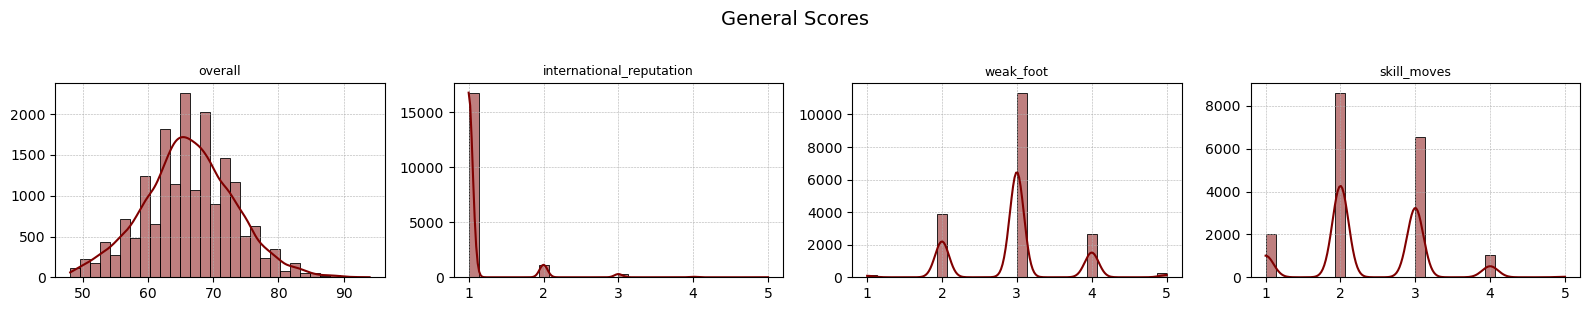

In [38]:
extra_groups = {
    'Physical Profile': ['age', 'height_cm', 'weight_kg'],
    'Financial Stats': ['value_eur', 'wage_eur', 'release_clause_eur'],
    'General Scores': ['overall', 'international_reputation', 'weak_foot', 'skill_moves']
}

# Parameters for compact layout
plots_per_row = 4
plot_width = 4  # per subplot
plot_height = 3  # per row

# Plotting loop
for group, cols in extra_groups.items():
    rows = (len(cols) + plots_per_row - 1) // plots_per_row  # calculate needed rows
    plt.figure(figsize=(plot_width * plots_per_row, plot_height * rows))
    
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, plots_per_row, i)
        sns.histplot(data2[col], kde=True, bins=30, color='maroon')
        plt.title(col, fontsize=9)
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True, linestyle='--', linewidth=0.4)
    
    plt.suptitle(group, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


# INSIGHTS : 
-
-
-

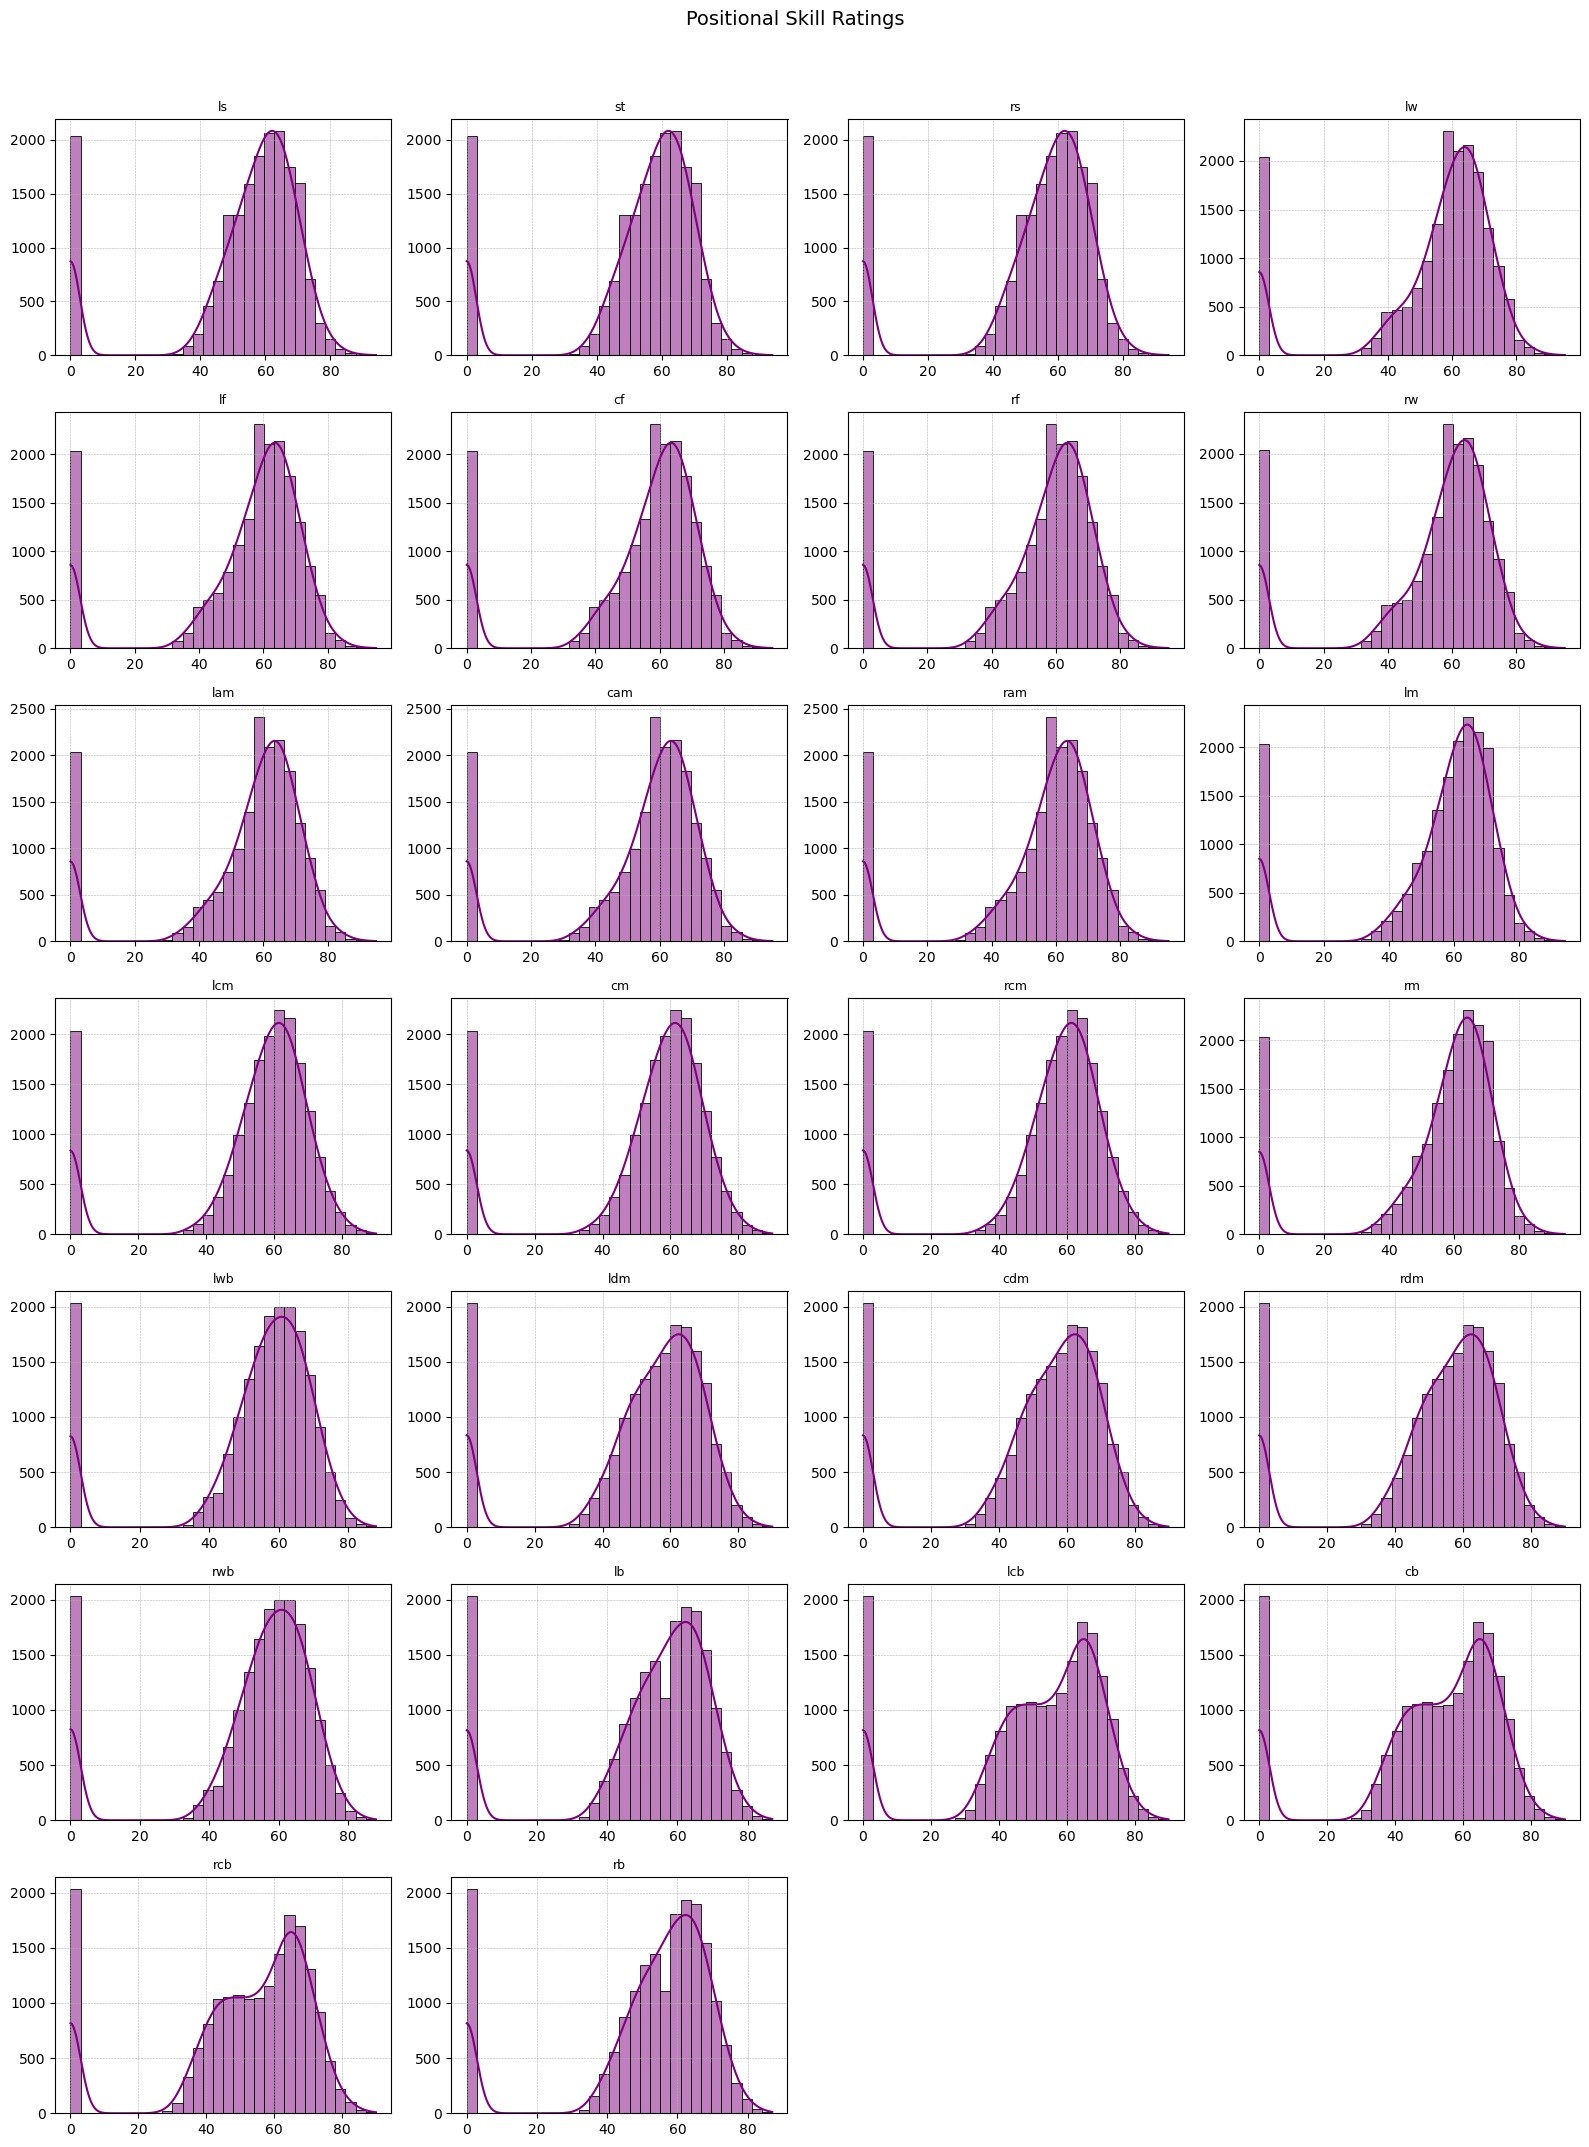

In [40]:
# Position Rating Plots – Numeric cols
plots_per_row = 4
plot_width = 4
plot_height = 3

position_ratings = [
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
    'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'
]

rows = (len(position_ratings) + plots_per_row - 1) // plots_per_row
plt.figure(figsize=(plot_width * plots_per_row, plot_height * rows))

for i, col in enumerate(position_ratings, 1):
    plt.subplot(rows, plots_per_row, i)
    sns.histplot(data2[col], kde=True, bins=30, color='purple')
    plt.title(col, fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', linewidth=0.4)

plt.suptitle("Positional Skill Ratings", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


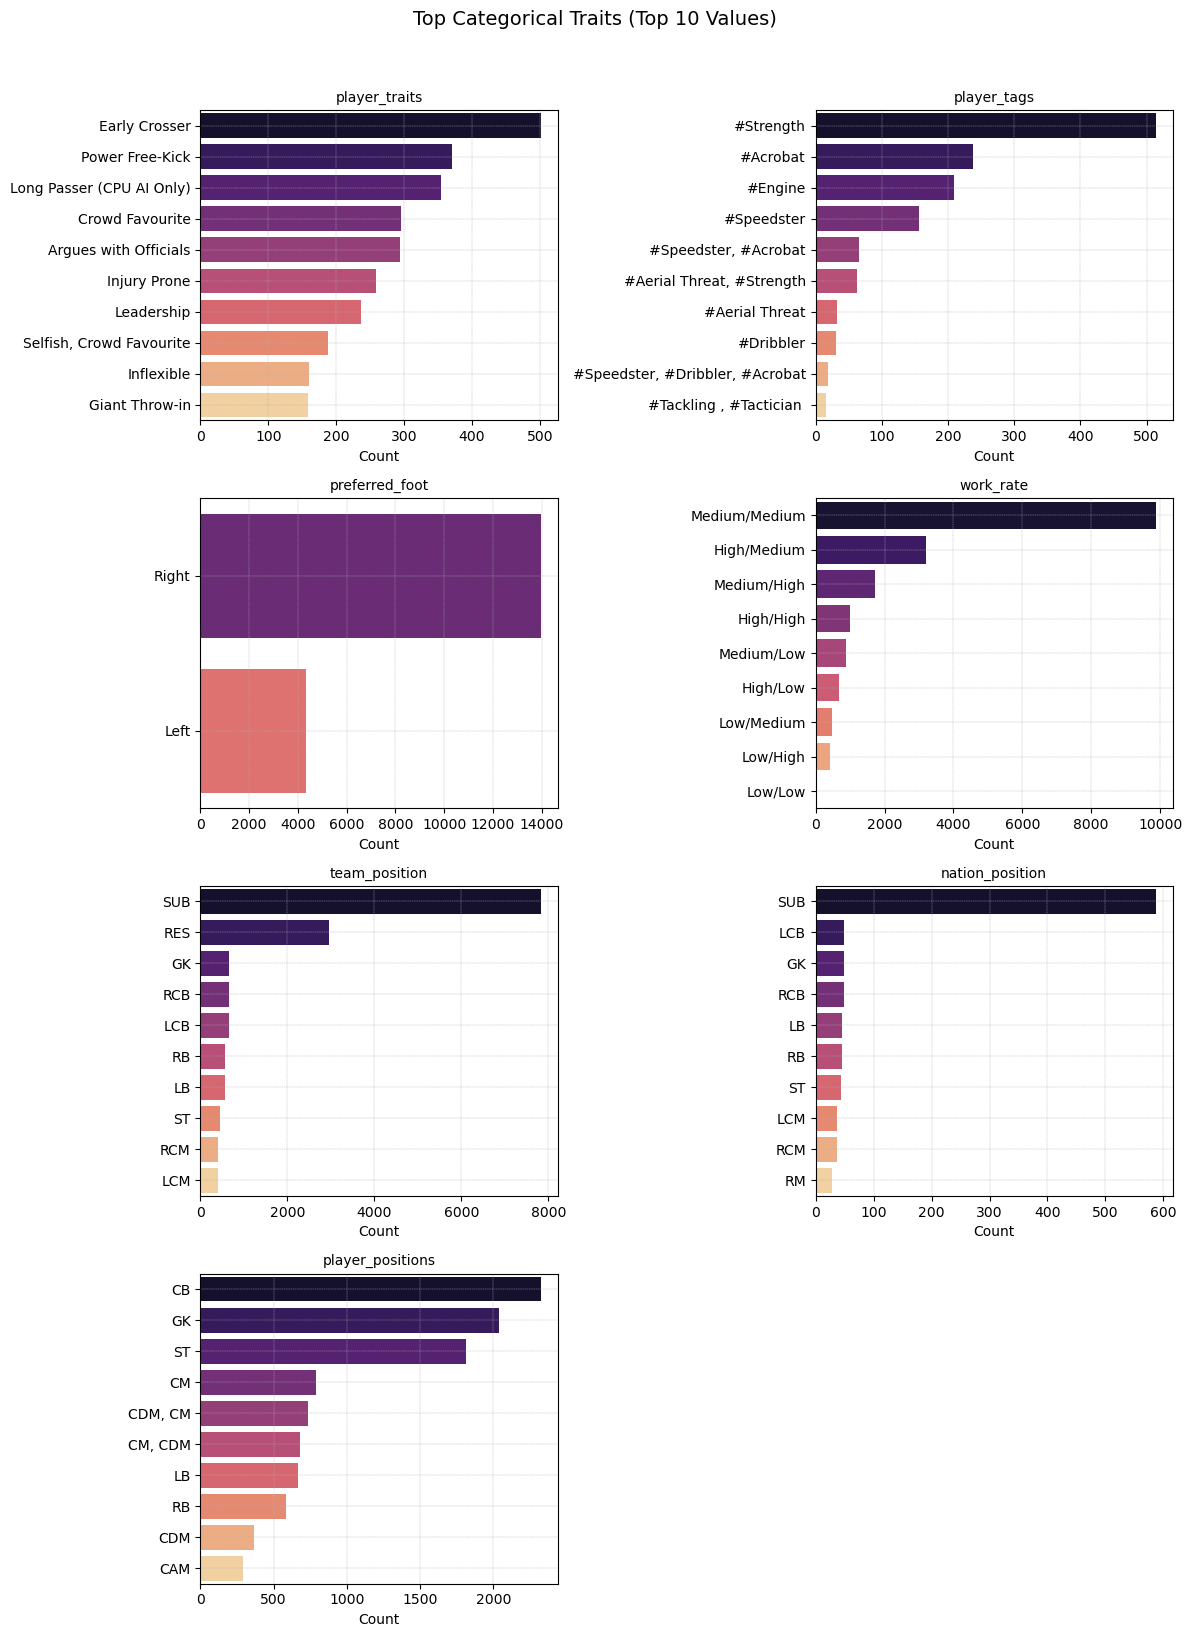

In [41]:
# Player Traits – Categorical Plot
trait_cats = [
    'player_traits', 'player_tags', 'preferred_foot',
    'work_rate', 'team_position', 'nation_position', 'player_positions'
]

plots_per_row = 2
rows = (len(trait_cats) + plots_per_row - 1) // plots_per_row
plt.figure(figsize=(6 * plots_per_row, 4 * rows))

for i, col in enumerate(trait_cats, 1):
    plt.subplot(rows, plots_per_row, i)
    top_values = data2[col].value_counts().nlargest(10)
    sns.barplot(x=top_values.values, y=top_values.index, palette='magma')
    plt.title(col, fontsize=10)
    plt.xlabel('Count')
    plt.ylabel('')
    plt.grid(True, linestyle='--', linewidth=0.3)

plt.suptitle("Top Categorical Traits (Top 10 Values)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Bivariate Analysis

In [43]:
# Filter players with striker roles
strikers = data2[data2['player_positions'].str.contains('ST|CF|LF|RF', na=False)]

# Get top 10 strikers by overall
top_10_strikers = strikers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_strikers)


           short_name  overall
0            L. Messi       94
1   Cristiano Ronaldo       93
4           E. Hazard       91
9            M. Salah       90
10          K. Mbappé       89
12            H. Kane       89
17          S. Agüero       89
19          L. Suárez       89
20     R. Lewandowski       89
22       A. Griezmann       89


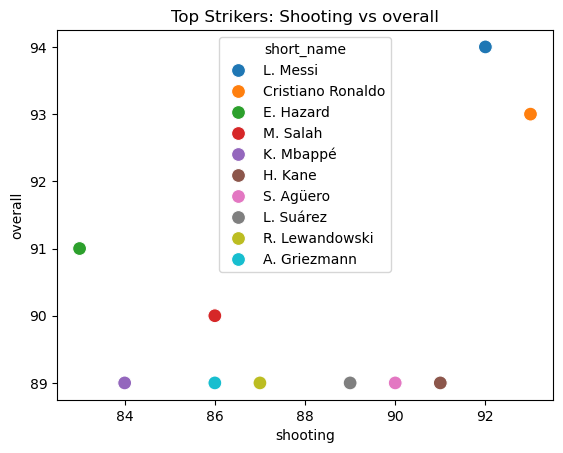

In [44]:
# Top 10 Strikers by Overall
top_strikers = strikers.sort_values(by='overall', ascending=False).head(10)

# Plot: Finishing vs Shooting
sns.scatterplot(data=top_strikers, x='shooting', y='overall', hue='short_name', s=100)
plt.title("Top Strikers: Shooting vs overall")
plt.show()


In [45]:
# Filter only goalkeepers
goalkeepers = data2[data2['player_positions'].str.contains('GK', na=False)]

# Get top 10 goalkeepers by overall rating
top_10_gks = goalkeepers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_gks)


       short_name  overall
3        J. Oblak       91
6   M. ter Stegen       90
13        Alisson       89
14         De Gea       89
25        Ederson       88
28    T. Courtois       88
30  S. Handanovič       88
31       M. Neuer       88
32      H. Lloris       88
53       K. Navas       87


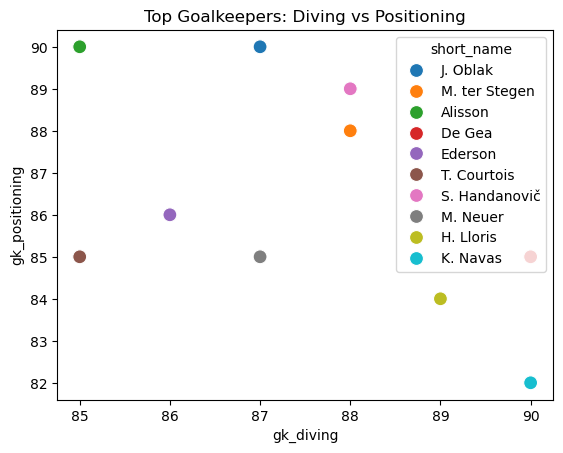

In [46]:
top_gks = goalkeepers.sort_values(by='overall', ascending=False).head(10)

# Plot: GK Diving vs Positioning
sns.scatterplot(data=top_gks, x='gk_diving', y='gk_positioning', hue='short_name', s=100)
plt.title("Top Goalkeepers: Diving vs Positioning")
plt.show()


In [47]:
# Filter players with defender roles
defenders = data2[data2['player_positions'].str.contains('CB|LB|RB|LWB|RWB', na=False)]

# Get top 10 defenders by overall rating
top_10_defenders = defenders[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_defenders)


       short_name  overall
7     V. van Dijk       90
16   G. Chiellini       89
18   Sergio Ramos       89
11   K. Koulibaly       89
29          Piqué       88
35       D. Godín       88
40     A. Laporte       87
45   Thiago Silva       87
47  J. Vertonghen       87
49     M. Hummels       87


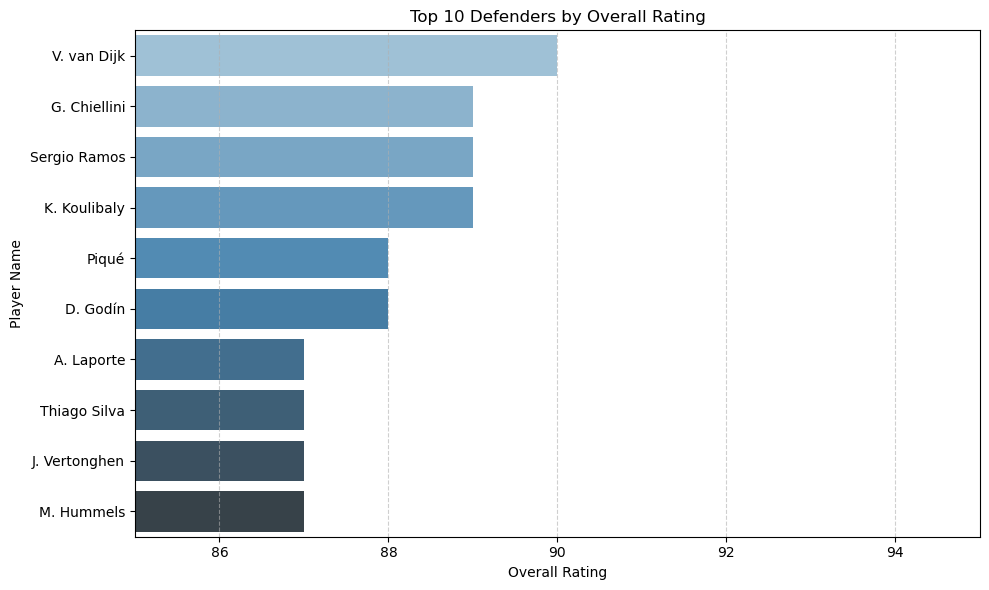

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_defenders, x='overall', y='short_name', palette='Blues_d')

plt.title("Top 10 Defenders by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.xlim(85, 95)  # adjust if needed
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [49]:
# Filter players with midfield roles
midfielders = data2[data2['player_positions'].str.contains('CM|CDM|CAM|LM|RM|LCM|RCM|LAM|RAM', na=False)]

# Get top 10 midfielders by overall rating
top_10_midfielders = midfielders[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_midfielders)


         short_name  overall
2         Neymar Jr       92
5      K. De Bruyne       91
8         L. Modrić       90
15         N. Kanté       89
21  Sergio Busquets       89
23        P. Dybala       88
24         P. Pogba       88
27       C. Eriksen       88
33      David Silva       88
36         T. Kroos       88


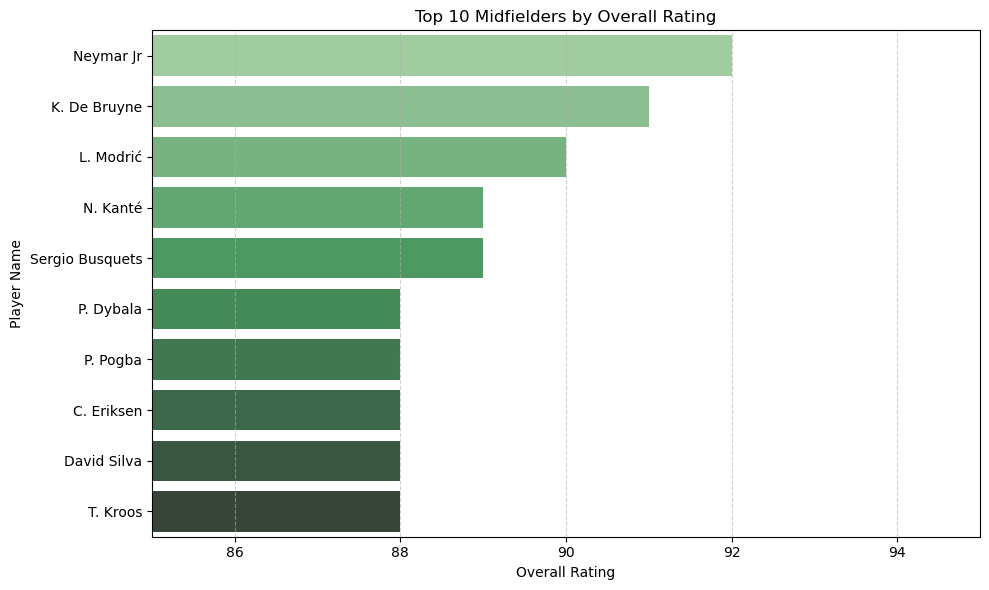

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_midfielders, x='overall', y='short_name', palette='Greens_d')

plt.title("Top 10 Midfielders by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.xlim(85, 95)  # adjust as needed
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [51]:
# Filter players with striker roles
strikers = data2[data2['player_positions'].str.contains('ST|CF|LF|RF', na=False)]

# Get top 10 strikers by overall
top_10_strikers = strikers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_strikers)


           short_name  overall
0            L. Messi       94
1   Cristiano Ronaldo       93
4           E. Hazard       91
9            M. Salah       90
10          K. Mbappé       89
12            H. Kane       89
17          S. Agüero       89
19          L. Suárez       89
20     R. Lewandowski       89
22       A. Griezmann       89


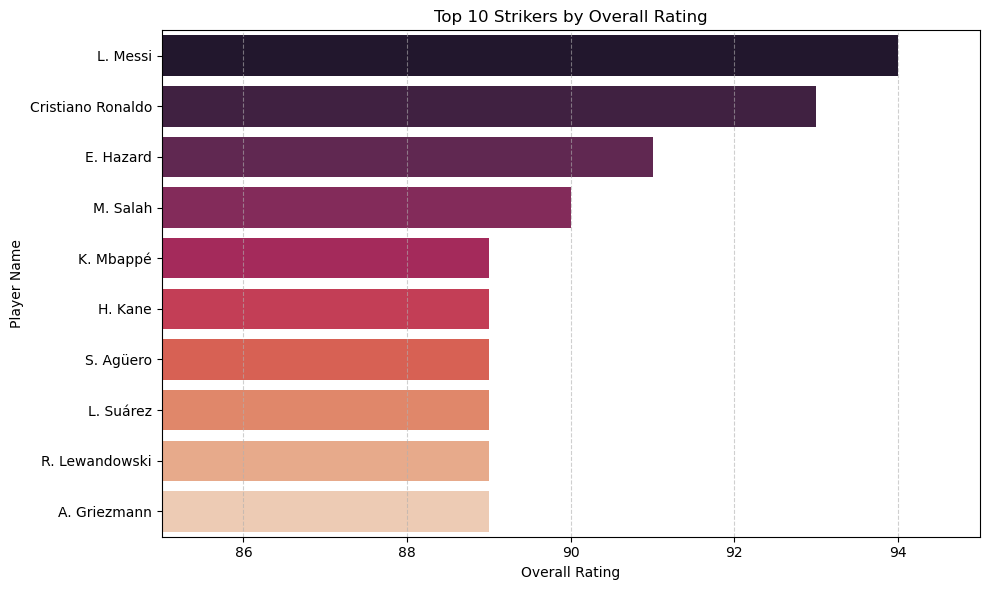

In [52]:
# Top 10 Strikers with best overall
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_strikers, x='overall', y='short_name', palette='rocket')

plt.title("Top 10 Strikers by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.xlim(85, 95)  # optional: adjust based on your data
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [53]:
# Top 10 goalkeepers
goalkeepers = data2[data2['player_positions'].str.contains('GK', na=False)]

# Get top 10 goalkeepers by overall rating
top_10_gks = goalkeepers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
print(top_10_gks)


       short_name  overall
3        J. Oblak       91
6   M. ter Stegen       90
13        Alisson       89
14         De Gea       89
25        Ederson       88
28    T. Courtois       88
30  S. Handanovič       88
31       M. Neuer       88
32      H. Lloris       88
53       K. Navas       87


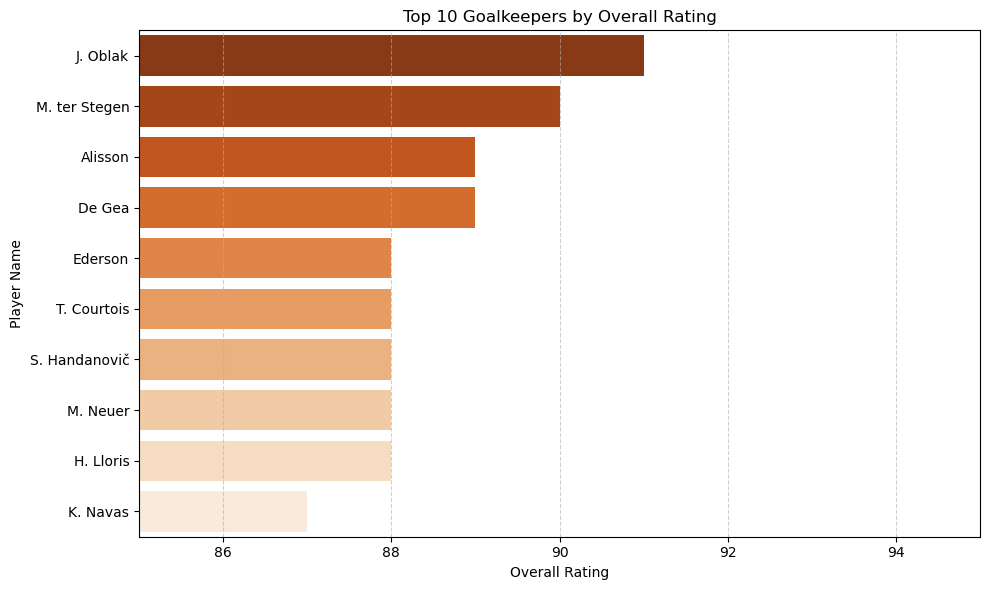

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_gks, x='overall', y='short_name', palette='Oranges_r')

plt.title("Top 10 Goalkeepers by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.xlim(85, 95)  # adjust based on data
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


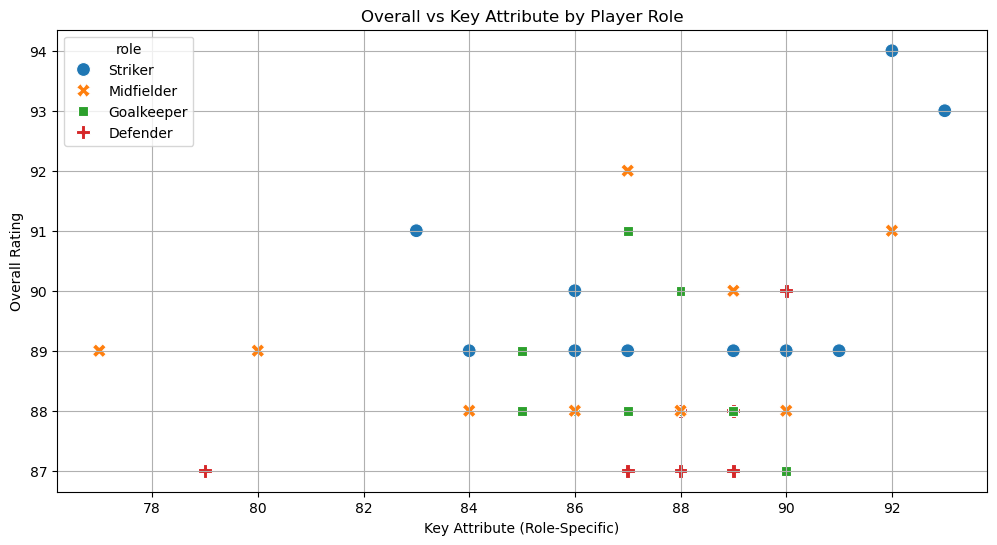

In [55]:
# Extract top players by role and relevant attributes
striker_df = strikers[['short_name', 'overall', 'shooting']].copy()
striker_df['role'] = 'Striker'
striker_df = striker_df.rename(columns={'shooting': 'key_attribute'})

defender_df = defenders[['short_name', 'overall', 'defending']].copy()
defender_df['role'] = 'Defender'
defender_df = defender_df.rename(columns={'defending': 'key_attribute'})

midfielder_df = midfielders[['short_name', 'overall', 'passing']].copy()
midfielder_df['role'] = 'Midfielder'
midfielder_df = midfielder_df.rename(columns={'passing': 'key_attribute'})

goalkeeper_df = goalkeepers[['short_name', 'overall', 'gk_diving']].copy()
goalkeeper_df['role'] = 'Goalkeeper'
goalkeeper_df = goalkeeper_df.rename(columns={'gk_diving': 'key_attribute'})

# Combine all into one DataFrame
combined_roles = pd.concat([striker_df, defender_df, midfielder_df, goalkeeper_df], ignore_index=True)

# Optional: Keep only top N for clarity
combined_roles = combined_roles.sort_values(by='overall', ascending=False).groupby('role').head(10)

# Bivariate plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_roles, x='key_attribute', y='overall', hue='role', style='role', s=100)
plt.title("Overall vs Key Attribute by Player Role")
plt.xlabel("Key Attribute (Role-Specific)")
plt.ylabel("Overall Rating")
plt.grid(True)
plt.show()


In [56]:
# STRIKERS
strikers = data2[data2['player_positions'].str.contains('ST|CF|LF|RF', na=False)]
top_strikers = strikers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
top_strikers['role'] = 'Striker'

# MIDFIELDERS
midfielders = data2[data2['player_positions'].str.contains('CM|CDM|CAM|LM|RM|LCM|RCM|LAM|RAM', na=False)]
top_midfielders = midfielders[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
top_midfielders['role'] = 'Midfielder'

# DEFENDERS
defenders = data2[data2['player_positions'].str.contains('CB|LB|RB|LWB|RWB', na=False)]
top_defenders = defenders[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
top_defenders['role'] = 'Defender'

# GOALKEEPERS
goalkeepers = data2[data2['player_positions'].str.contains('GK', na=False)]
top_goalkeepers = goalkeepers[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)
top_goalkeepers['role'] = 'Goalkeeper'


In [57]:
top_combined = pd.concat([top_strikers, top_midfielders, top_defenders, top_goalkeepers], ignore_index=True)


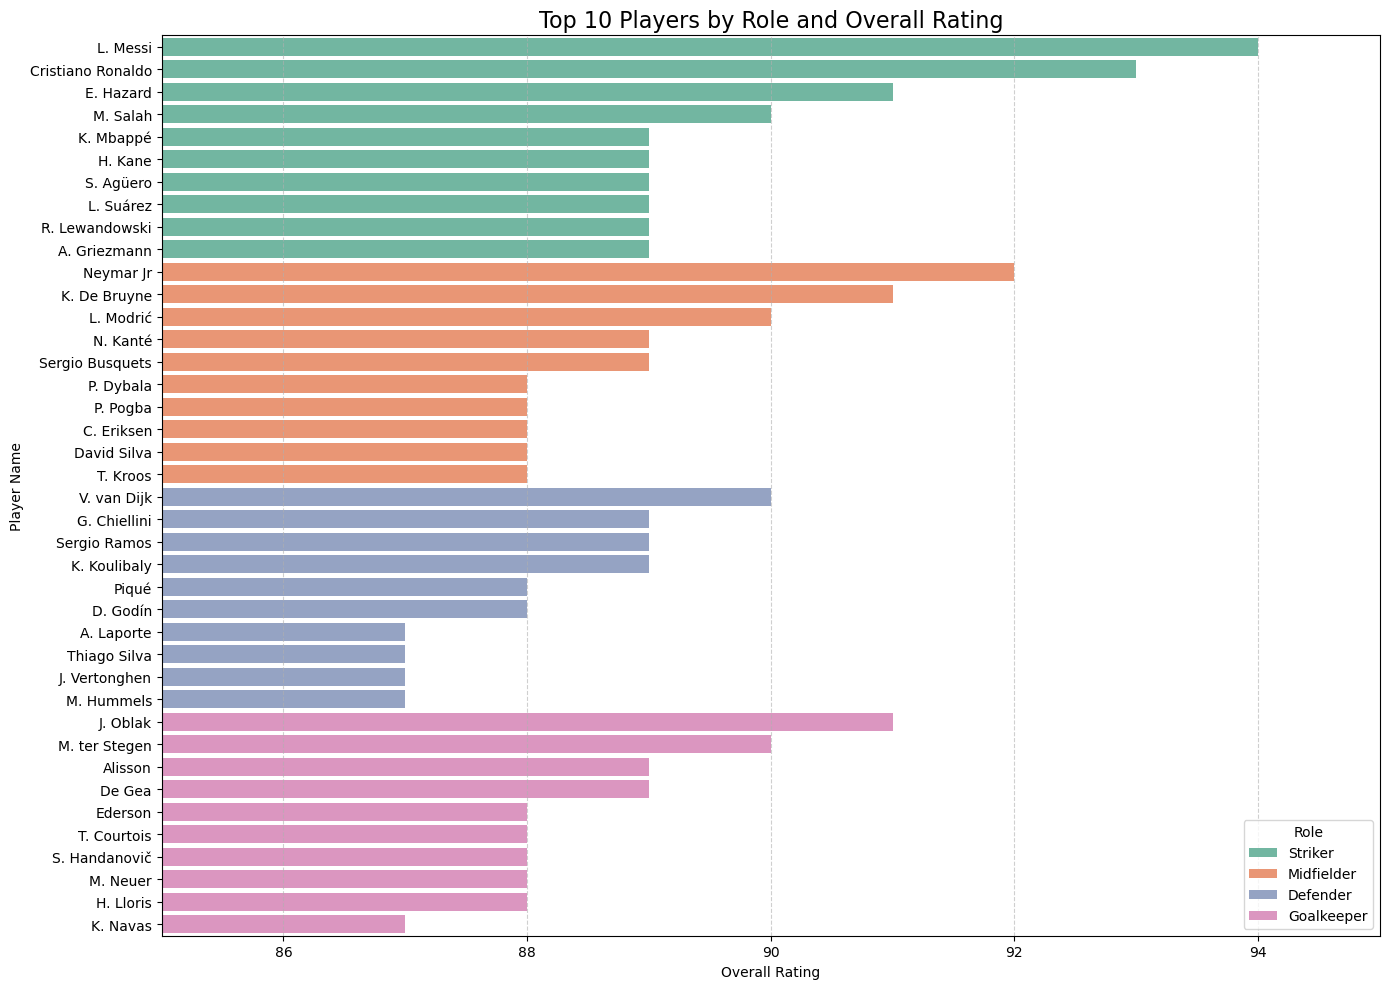

In [58]:
plt.figure(figsize=(14, 10))
sns.barplot(data=top_combined, x='overall', y='short_name', hue='role', dodge=False, palette='Set2')

plt.title("Top 10 Players by Role and Overall Rating", fontsize=16)
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.xlim(85, 95)  
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Role')
plt.tight_layout()
plt.show()


#### Comparing Players with their Value

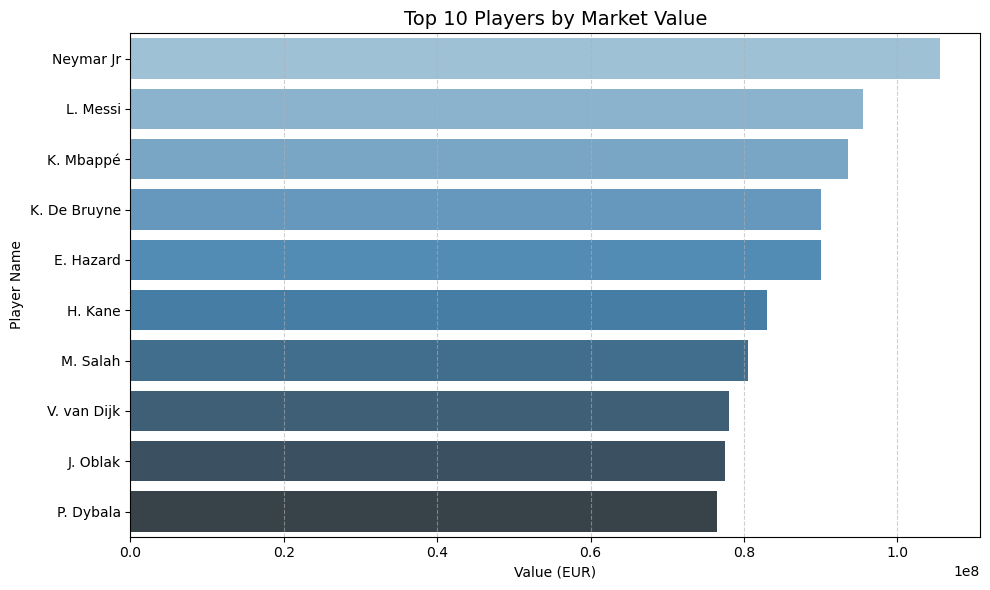

In [60]:
# Get top 10 players by value
top10_value = data2[['short_name', 'value_eur']].sort_values(by='value_eur', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_value, x='value_eur', y='short_name', palette='Blues_d')

plt.title("Top 10 Players by Market Value", fontsize=14)
plt.xlabel("Value (EUR)")
plt.ylabel("Player Name")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Comparing Players with their Wage

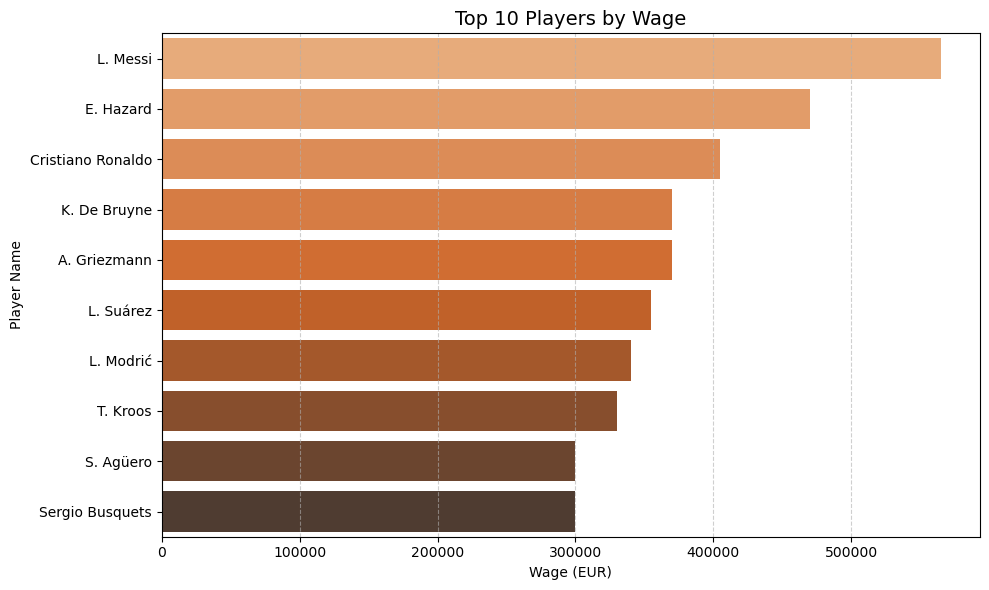

In [62]:
# Get top 10 players by wage
top10_wage = data2[['short_name', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_wage, x='wage_eur', y='short_name', palette='Oranges_d')

plt.title("Top 10 Players by Wage", fontsize=14)
plt.xlabel("Wage (EUR)")
plt.ylabel("Player Name")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


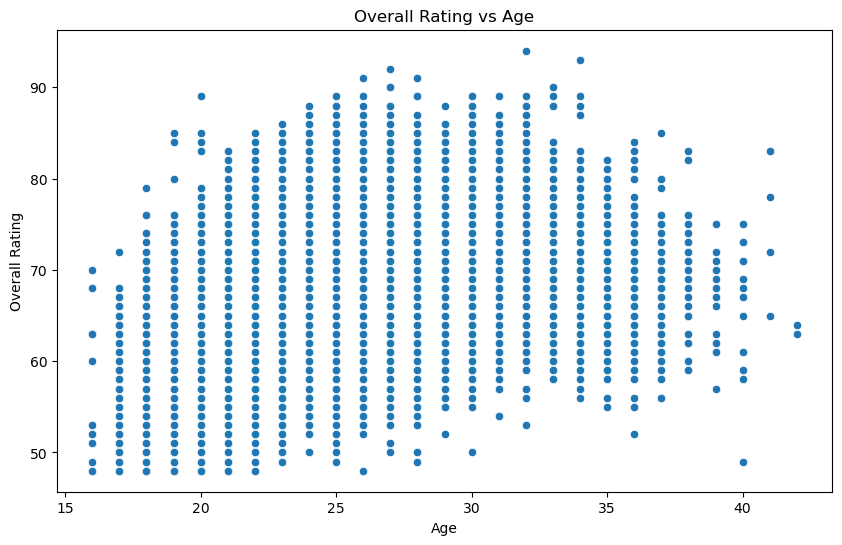

In [63]:
### Overall rating vs Age of players
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='age', y='overall')
plt.title('Overall Rating vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

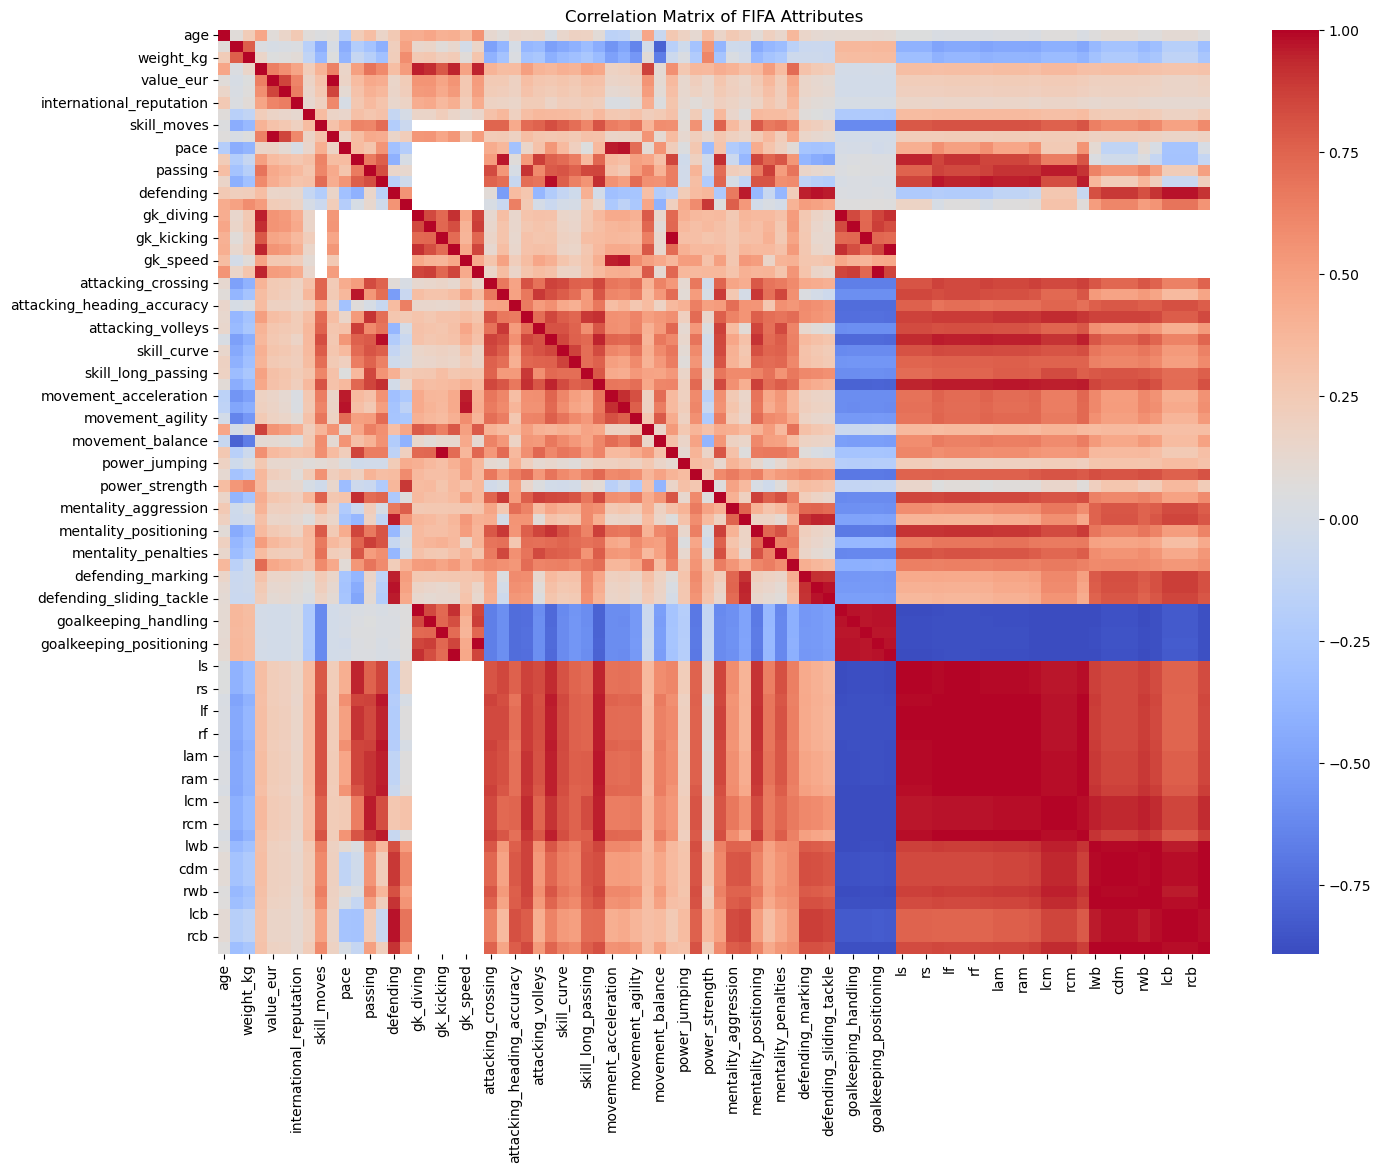

In [64]:
# Corelation Matrix
plt.figure(figsize=(16, 12))
sns.heatmap(data2.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of FIFA Attributes")
plt.show()


#### Wage vs Player position

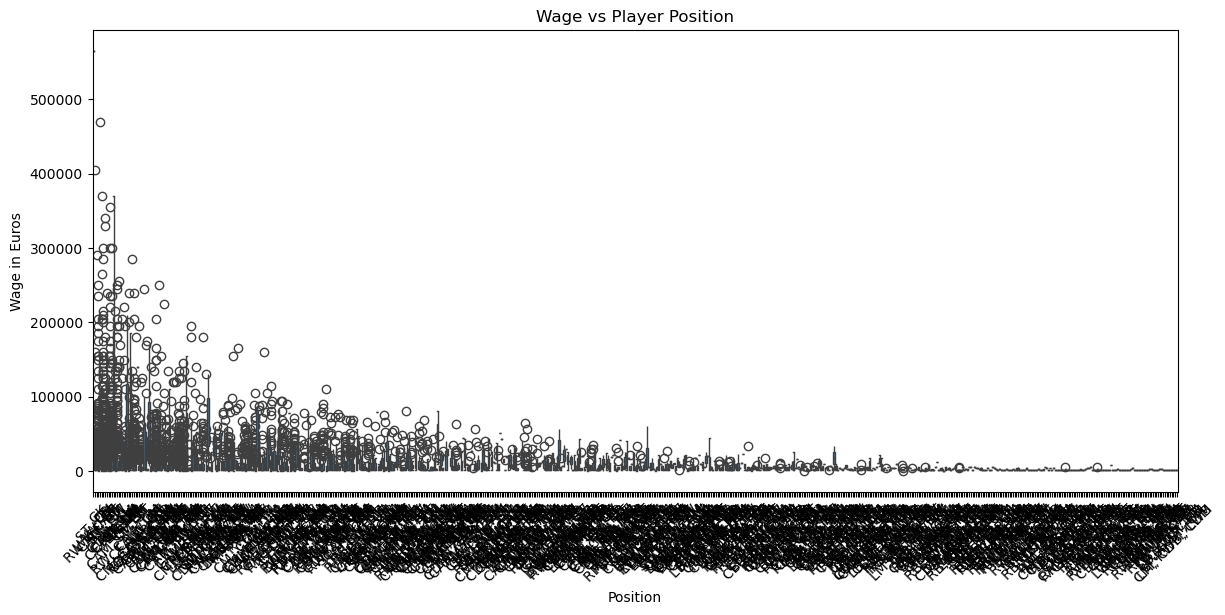

In [66]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data2, x='player_positions', y='wage_eur')
plt.xticks(rotation=45)
plt.title('Wage vs Player Position')
plt.xlabel('Position')
plt.ylabel('Wage in Euros')
plt.show()

### Work rate vs Overall

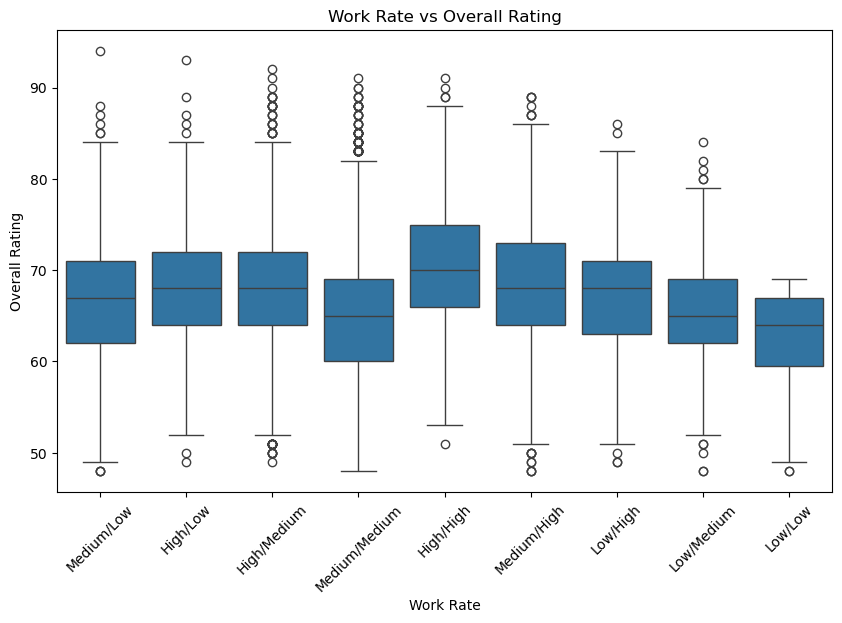

In [68]:
if 'work_rate' in data2.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data2, x='work_rate', y='overall')
    plt.title('Work Rate vs Overall Rating')
    plt.xlabel('Work Rate')
    plt.ylabel('Overall Rating')
    plt.xticks(rotation=45)
    plt.show()

#### Acceleration vs Sprint Speed

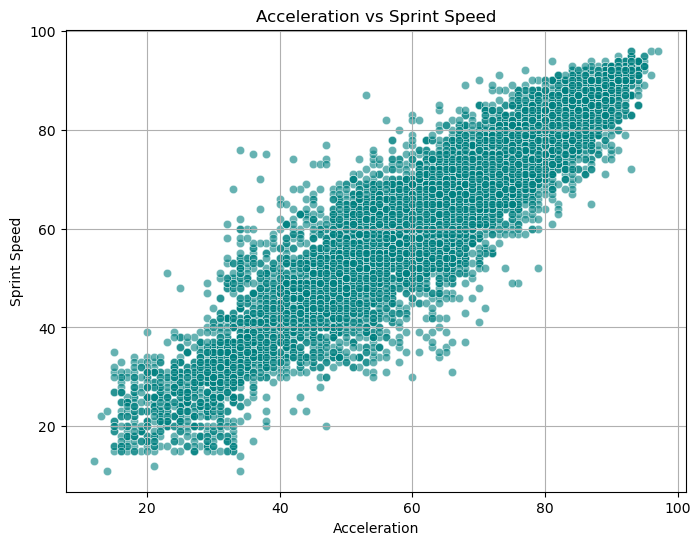

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='movement_acceleration', y='movement_sprint_speed', alpha=0.6, color='teal')
plt.title('Acceleration vs Sprint Speed')
plt.xlabel('Acceleration')
plt.ylabel('Sprint Speed')
plt.grid(True)
plt.show()

#### Work rate vs Wage

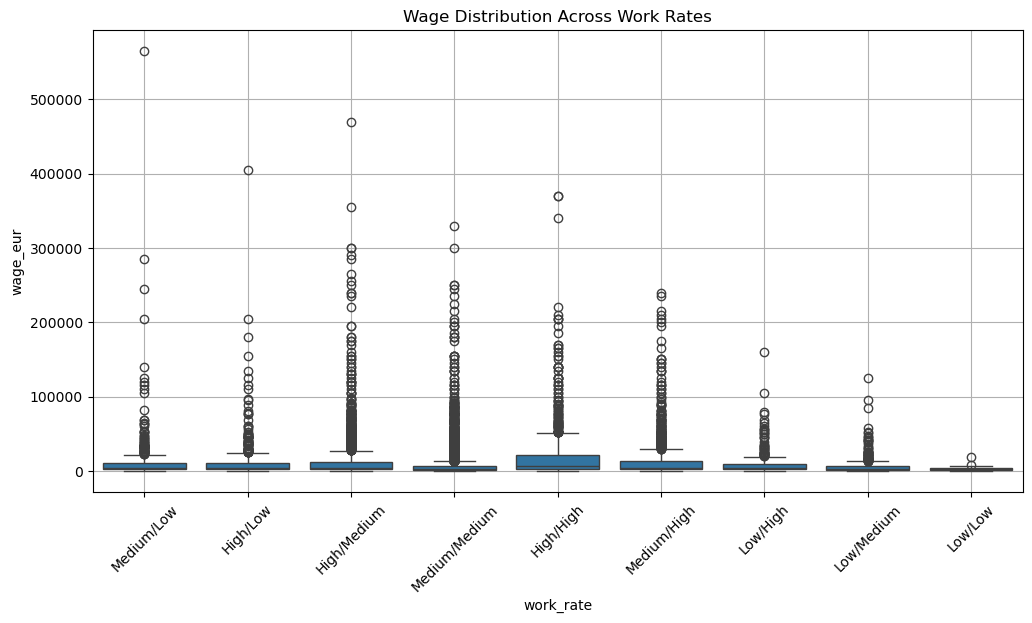

In [72]:
plt.figure(figsize=(12, 6))
top_work_rates = data2['work_rate'].value_counts().nlargest(10).index
filtered_workrate = data2[data2['work_rate'].isin(top_work_rates)]

sns.boxplot(data=filtered_workrate, x='work_rate', y='wage_eur')
plt.title('Wage Distribution Across Work Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Player Value vs Overall Rating

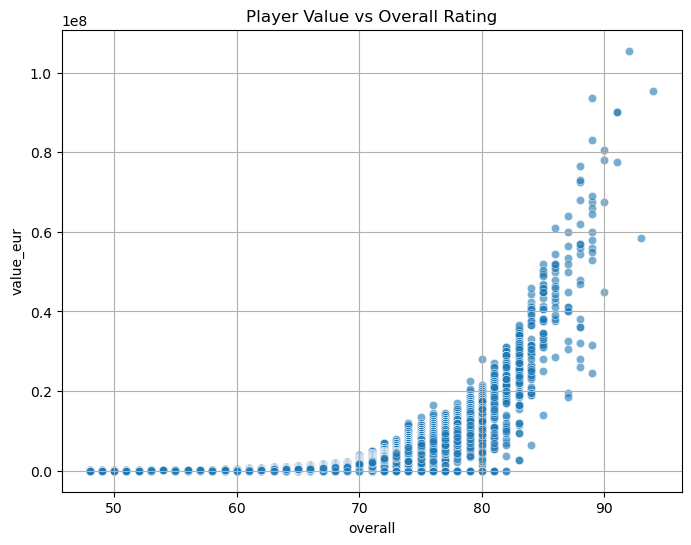

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='overall', y='value_eur', alpha=0.6)
plt.title('Player Value vs Overall Rating')
plt.grid(True)
plt.show()

#### Agility vs Dribbling

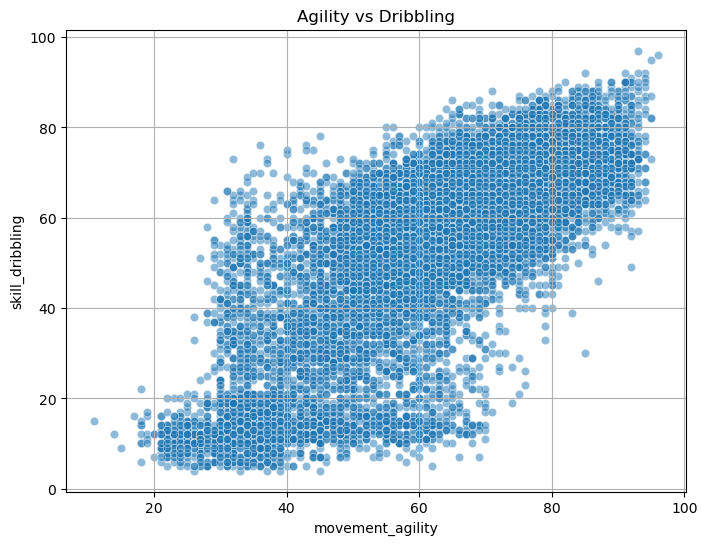

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='movement_agility', y='skill_dribbling', alpha=0.5)
plt.title('Agility vs Dribbling')
plt.grid(True)
plt.show()

# Multivariate Analysis

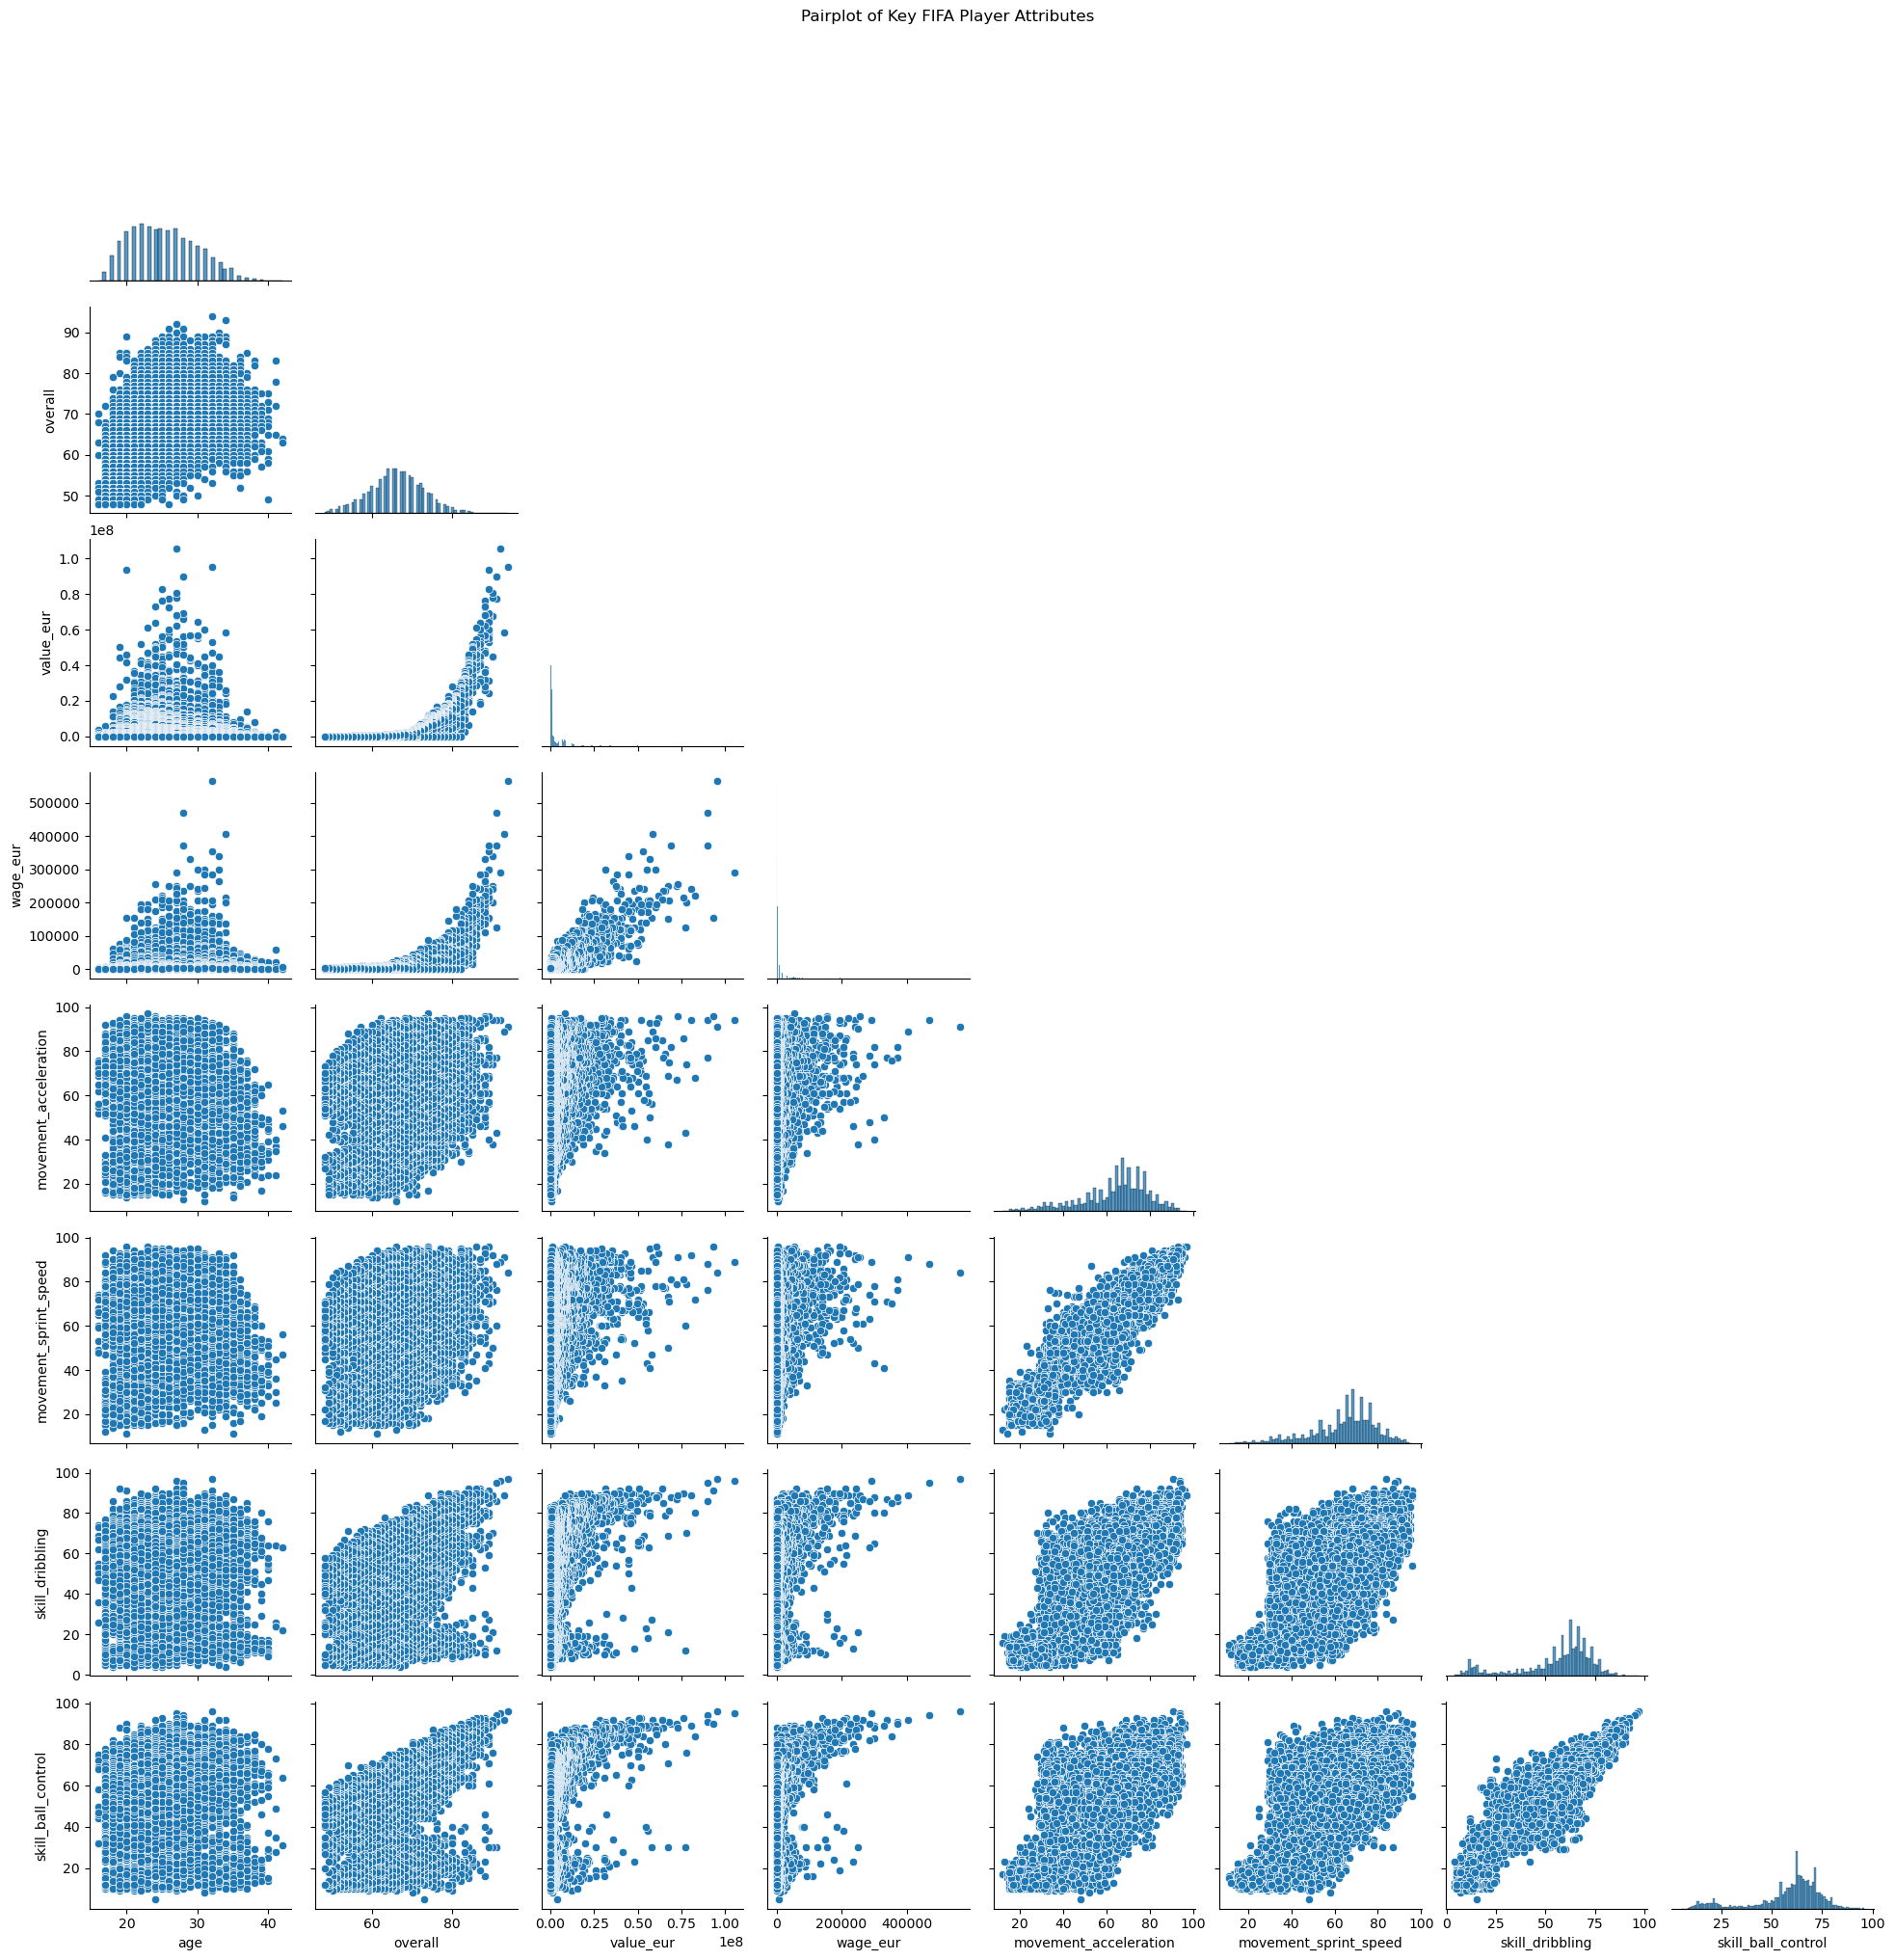

In [78]:
# Select important numerical features
features = [
    'age', 'overall', 'value_eur', 'wage_eur',
    'movement_acceleration', 'movement_sprint_speed',
    'skill_dribbling', 'skill_ball_control'
]

# Drop rows with null values in these columns
df = data2[features].dropna()

# Create pairplot
sns.pairplot(df, corner=True)
plt.suptitle("Pairplot of Key FIFA Player Attributes", y=1.02)
plt.show()

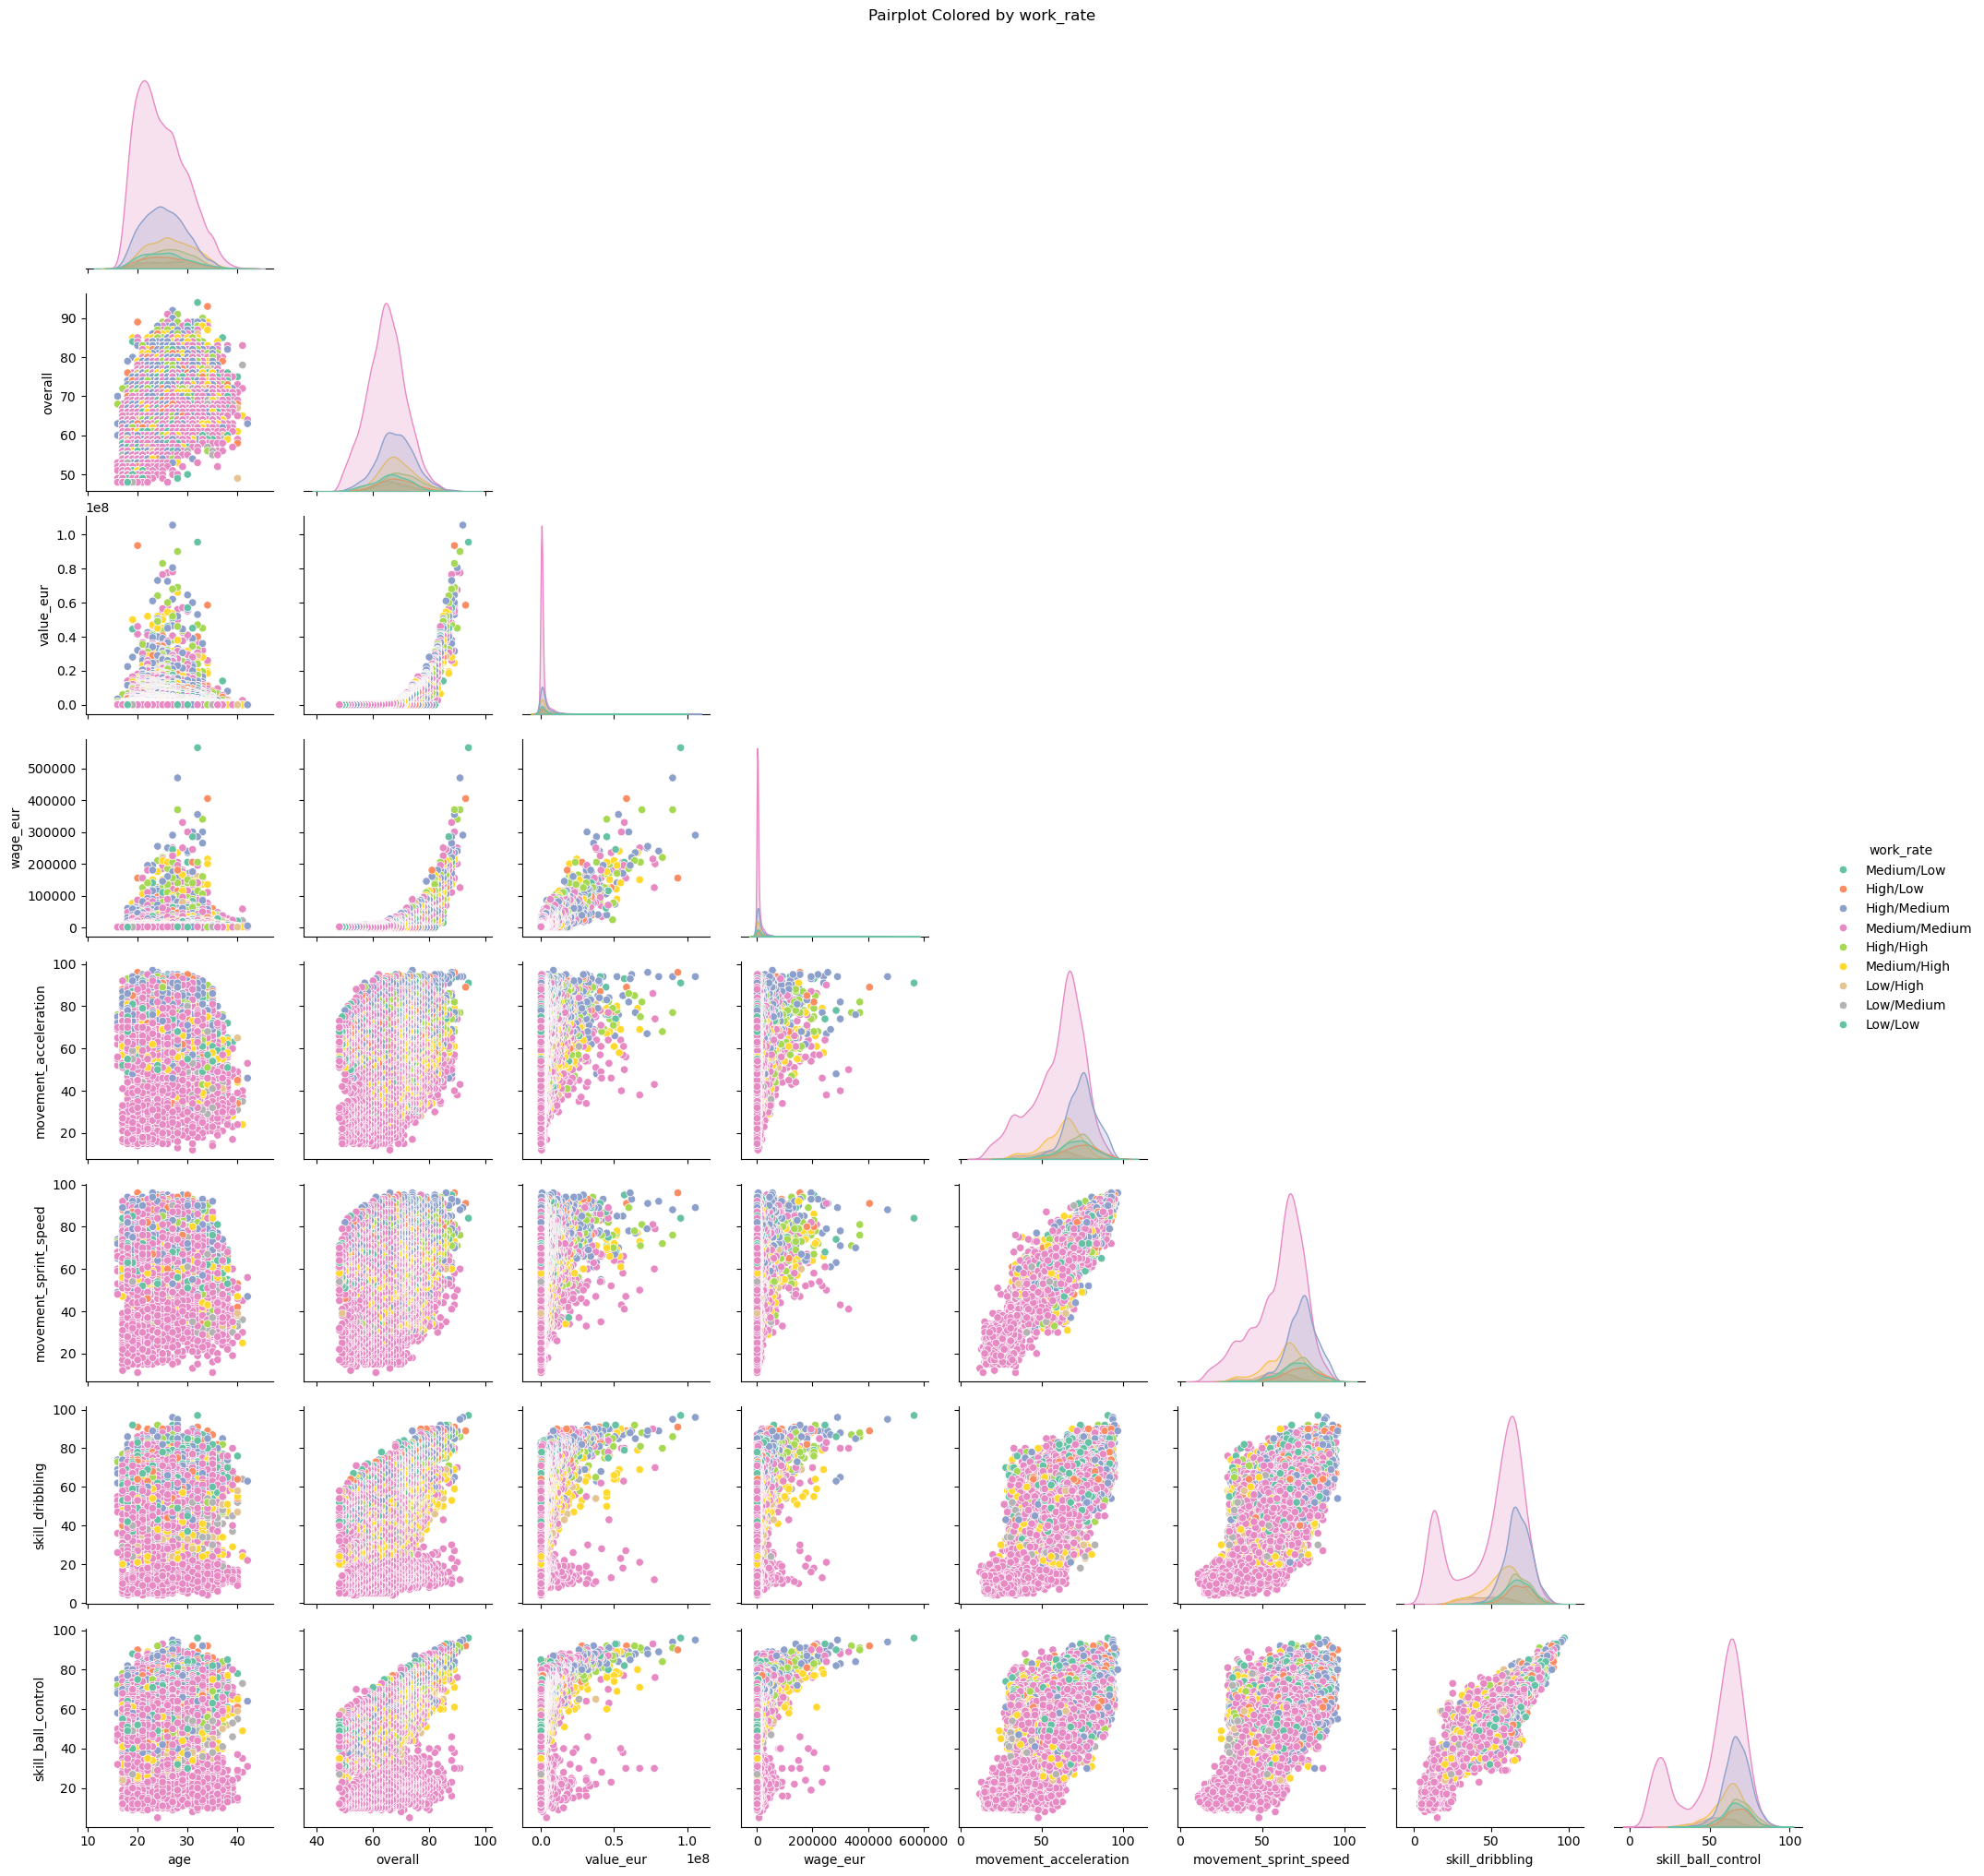

In [79]:
# Pairplot colored by Preffered Foot
df2 = data2[['work_rate'] + features].dropna()
sns.pairplot(df2, hue='work_rate', corner=True, palette='Set2')
plt.suptitle("Pairplot Colored by work_rate", y=1.02)
plt.show()


# TASK 2

In [81]:
pd.set_option('display.max_rows', None)


# Now display null values count for all columns
data2.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
nation_position               17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                 

In [82]:
data2.head()

short_name  age         dob  height_cm  weight_kg nationality  \
0           L. Messi   32  1987-06-24        170         72   Argentina   
1  Cristiano Ronaldo   34  1985-02-05        187         83    Portugal   
2          Neymar Jr   27  1992-02-05        175         68      Brazil   
3           J. Oblak   26  1993-01-07        188         87    Slovenia   
4          E. Hazard   28  1991-01-07        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint-Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   
4    High/Medium         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

  nation_position  pace  shooting  passing  dribbling  defending  physic  \
0             NaN  87.0      92.0     92.0       96.0       39.0    66.0   
1              LS  90.0      93.0     82.0       89.0       35.0    78.0   
2              LW  91.0      85.0     87.0       95.0       32.0    58.0   
3              GK   NaN       NaN      NaN        NaN        NaN     NaN   
4              LF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        NaN          NaN         NaN          NaN       NaN             NaN   
1        NaN          NaN         NaN          NaN       NaN             NaN   
2        NaN          NaN         NaN          NaN       NaN             NaN   
3       87.0         92.0        78.0         89.0      52.0            90.0   
4        NaN          NaN         NaN          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                  13   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87 

In [83]:
data2.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'release_clause_eur', 'player_tags',
       'team_position', 'nation_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'ment

In [84]:
data2.drop(['gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',], axis=1, inplace=True)

In [85]:
data2.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'release_clause_eur', 'player_tags',
       'team_position', 'nation_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

In [86]:
pd.set_option('display.max_rows', None)


# Now display null values count for all columns
data2.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
nation_position               17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
player_traits                 10712
attacking_crossing          

### Treating Null values

#### Replacing null values central tendencies

In [89]:
target_columns1 = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [90]:
for col in target_columns1:
    if col in data2.columns:
        data2[col].fillna(data2[col].mean(), inplace=True)

In [91]:
pd.set_option('display.max_rows', None)


# Now display null values count for all columns
data2.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
nation_position               17152
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
player_traits                 10712
attacking_crossing          

In [92]:
target_columns2 = ['player_tags','team_position', 'nation_position']

In [93]:
for col in target_columns2:
    if col in data2.columns:
        data2[col].fillna(data2[col].mode()[0], inplace=True)

In [94]:
pd.set_option('display.max_rows', None)

# Now display null values count for all columns
data2.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
player_tags                       0
team_position                     0
nation_position                   0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
player_traits                 10712
attacking_crossing          

In [95]:
data2['release_clause_eur'].fillna(data2['release_clause_eur'].median(), inplace=True)

In [96]:
data2.drop(['player_traits'], axis=1, inplace=True)

In [97]:
pd.set_option('display.max_rows', None)

# Now display null values count for all columns
data2.isnull().sum()

short_name                    0
age                           0
dob                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
release_clause_eur            0
player_tags                   0
team_position                 0
nation_position               0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

In [98]:
#All null values has been Treated

In [99]:
data2.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'release_clause_eur', 'player_tags',
       'team_position', 'nation_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties

In [100]:
data2['player_tags'] = data2['player_tags'].str.replace(r'[^\w\s]', '', regex=True)

In [101]:
data2.head()

short_name  age         dob  height_cm  weight_kg nationality  \
0           L. Messi   32  1987-06-24        170         72   Argentina   
1  Cristiano Ronaldo   34  1985-02-05        187         83    Portugal   
2          Neymar Jr   27  1992-02-05        175         68      Brazil   
3           J. Oblak   26  1993-01-07        188         87    Slovenia   
4          E. Hazard   28  1991-01-07        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint-Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   
4    High/Medium         184500000.0   

                                         player_tags team_position  \
0  Dribbler Distance Shooter Crosser FK Specialis...            RW   
1  Speedster Dribbler Distance Shooter Acrobat Cl...            LW   
2  Speedster Dribbler Playmaker   Crosser FK Spec...           CAM   
3                                           Strength            GK   
4                         Speedster Dribbler Acrobat            LW   

  nation_position       pace   shooting    passing  dribbling  defending  \
0             SUB  87.000000  92.000000  92.000000  96.000000  39.000000   
1              LS  90.000000  93.000000  82.000000  89.000000  35.000000   
2              LW  91.000000  85.000000  87.000000  95.000000  32.000000   
3              GK  67.700899  52.298301  57.233777  62.531585  51.553503   
4              LF  91.000000  83.000000  86.000000  94.000000  35.000000   

      physic  attacking_crossing  attacking_finishing  \
0  66.000000                  88                   95   
1  78.000000                  84                   94   
2  58.000000                  87                   87   
3  64.876678                  13                   11   
4  66.000000                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43 

In [102]:
# Seperating DOB Column
data2[['dob_year', 'dob_month', 'dob_day']] = data2['dob'].str.split('-', expand=True) # splitting

In [103]:
data2[['dob', 'dob_year', 'dob_month', 'dob_day']].head()
# seperated .

dob dob_year dob_month dob_day
0  1987-06-24     1987        06      24
1  1985-02-05     1985        02      05
2  1992-02-05     1992        02      05
3  1993-01-07     1993        01      07
4  1991-01-07     1991        01      07

In [104]:
# dropping needless columns
data2.drop(['dob_day', 'dob_month', 'dob'], axis=1, inplace=True)

In [105]:
data2.head(4)
# added at last

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint-Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   

                                         player_tags team_position  \
0  Dribbler Distance Shooter Crosser FK Specialis...            RW   
1  Speedster Dribbler Distance Shooter Acrobat Cl...            LW   
2  Speedster Dribbler Playmaker   Crosser FK Spec...           CAM   
3                                           Strength            GK   

  nation_position       pace   shooting    passing  dribbling  defending  \
0             SUB  87.000000  92.000000  92.000000  96.000000  39.000000   
1              LS  90.000000  93.000000  82.000000  89.000000  35.000000   
2              LW  91.000000  85.000000  87.000000  95.000000  32.000000   
3              GK  67.700899  52.298301  57.233777  62.531585  51.553503   

      physic  attacking_crossing  attacking_finishing  \
0  66.000000                  88                   95   
1  78.000000                  84                   94   
2  58.000000                  87                   87   
3  64.876678                  13                   11   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   
2                96                  92                84                80   
3                67                  88                49                59   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81           

In [106]:
# Removing delimeters for : short_name, club.

data2['short_name'] = data2['short_name'].apply(lambda x: x.replace('.', ' ') if '.' in x else x) # Replacing '.' with '' 

data2['club'] = data2['club'].apply(lambda x: x.replace('-', ' ') if '-' in x else x)# Replacing '-' with ' ' 

In [107]:
data2.head()
# Delimeter removed.

short_name  age  height_cm  weight_kg nationality  \
0           L  Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J  Oblak   26        188         87    Slovenia   
4          E  Hazard   28        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

       work_rate  release_clause_eur  \
0     Medium/Low         195800000.0   
1       High/Low          96500000.0   
2    High/Medium         195200000.0   
3  Medium/Medium         164700000.0   
4    High/Medium         184500000.0   

                                         player_tags team_position  \
0  Dribbler Distance Shooter Crosser FK Specialis...            RW   
1  Speedster Dribbler Distance Shooter Acrobat Cl...            LW   
2  Speedster Dribbler Playmaker   Crosser FK Spec...           CAM   
3                                           Strength            GK   
4                         Speedster Dribbler Acrobat            LW   

  nation_position       pace   shooting    passing  dribbling  defending  \
0             SUB  87.000000  92.000000  92.000000  96.000000  39.000000   
1              LS  90.000000  93.000000  82.000000  89.000000  35.000000   
2              LW  91.000000  85.000000  87.000000  95.000000  32.000000   
3              GK  67.700899  52.298301  57.233777  62.531585  51.553503   
4              LF  91.000000  83.000000  86.000000  94.000000  35.000000   

      physic  attacking_crossing  attacking_finishing  \
0  66.000000                  88                   95   
1  78.000000                  84                   94   
2  58.000000                  87                   87   
3  64.876678                  13                   11   
4  66.000000                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94  

In [108]:
# splitting work_rate column : 
data2['work_rate'] = data2['work_rate'].astype(str)

data2[['work_rate1', 'work_rate2']] = data2['work_rate'].str.split('/', expand=True) # Split into two new columns

In [109]:
data2[['work_rate', 'work_rate1', 'work_rate2']].head()

work_rate work_rate1 work_rate2
0     Medium/Low     Medium        Low
1       High/Low       High        Low
2    High/Medium       High     Medium
3  Medium/Medium     Medium     Medium
4    High/Medium       High     Medium

In [110]:
# dropping the needless col :
data2.drop(['work_rate'],axis = 1, inplace = True)

In [111]:
data2.head()

short_name  age  height_cm  weight_kg nationality  \
0           L  Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J  Oblak   26        188         87    Slovenia   
4          E  Hazard   28        175         74     Belgium   

                  club  overall  value_eur  wage_eur player_positions  \
0         FC Barcelona       94   95500000    565000       RW, CF, ST   
1             Juventus       93   58500000    405000           ST, LW   
2  Paris Saint Germain       92  105500000    290000          LW, CAM   
3      Atlético Madrid       91   77500000    125000               GK   
4          Real Madrid       91   90000000    470000           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

   release_clause_eur                                        player_tags  \
0         195800000.0  Dribbler Distance Shooter Crosser FK Specialis...   
1          96500000.0  Speedster Dribbler Distance Shooter Acrobat Cl...   
2         195200000.0  Speedster Dribbler Playmaker   Crosser FK Spec...   
3         164700000.0                                           Strength   
4         184500000.0                         Speedster Dribbler Acrobat   

  team_position nation_position       pace   shooting    passing  dribbling  \
0            RW             SUB  87.000000  92.000000  92.000000  96.000000   
1            LW              LS  90.000000  93.000000  82.000000  89.000000   
2           CAM              LW  91.000000  85.000000  87.000000  95.000000   
3            GK              GK  67.700899  52.298301  57.233777  62.531585   
4            LW              LF  91.000000  83.000000  86.000000  94.000000   

   defending     physic  attacking_crossing  attacking_finishing  \
0  39.000000  66.000000                  88                   95   
1  35.000000  78.000000                  84                   94   
2  32.000000  58.000000                  87                   87   
3  51.553503  64.876678                  13                   11   
4  35.000000  66.000000                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0               

In [112]:
data2['player_positions'].max()
# so totally 3 cols

'ST, RWB, LM'

In [113]:
# Split 'player_positions' by space into multiple columns
position_split = data2['player_positions'].str.split(',', expand=True)

# Rename columns as player_pos1, player_pos2, ...
position_split.columns = [f'player_pos{i+1}' for i in range(position_split.shape[1])]

# Combine with original dataframe
data2 = pd.concat([data2, position_split], axis=1)


In [114]:
data2[['player_positions', 'player_pos1', 'player_pos2', 'player_pos3']].head()
# Now we can drop the initial col

player_positions player_pos1 player_pos2 player_pos3
0       RW, CF, ST          RW          CF          ST
1           ST, LW          ST          LW        None
2          LW, CAM          LW         CAM        None
3               GK          GK        None        None
4           LW, CF          LW          CF        None

In [115]:
data2.drop(['player_positions'],axis = 1 , inplace = True)

In [116]:
data2.head()

short_name  age  height_cm  weight_kg nationality  \
0           L  Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J  Oblak   26        188         87    Slovenia   
4          E  Hazard   28        175         74     Belgium   

                  club  overall  value_eur  wage_eur preferred_foot  \
0         FC Barcelona       94   95500000    565000           Left   
1             Juventus       93   58500000    405000          Right   
2  Paris Saint Germain       92  105500000    290000          Right   
3      Atlético Madrid       91   77500000    125000          Right   
4          Real Madrid       91   90000000    470000          Right   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

                                         player_tags team_position  \
0  Dribbler Distance Shooter Crosser FK Specialis...            RW   
1  Speedster Dribbler Distance Shooter Acrobat Cl...            LW   
2  Speedster Dribbler Playmaker   Crosser FK Spec...           CAM   
3                                           Strength            GK   
4                         Speedster Dribbler Acrobat            LW   

  nation_position       pace   shooting    passing  dribbling  defending  \
0             SUB  87.000000  92.000000  92.000000  96.000000  39.000000   
1              LS  90.000000  93.000000  82.000000  89.000000  35.000000   
2              LW  91.000000  85.000000  87.000000  95.000000  32.000000   
3              GK  67.700899  52.298301  57.233777  62.531585  51.553503   
4              LF  91.000000  83.000000  86.000000  94.000000  35.000000   

      physic  attacking_crossing  attacking_finishing  \
0  66.000000                  88                   95   
1  78.000000                  84                   94   
2  58.000000                  87                   87   
3  64.876678                  13                   11   
4  66.000000                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96

# Scaling

In [118]:
data3 = data2.copy()

In [119]:
data3.head()

short_name  age  height_cm  weight_kg nationality  \
0           L  Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J  Oblak   26        188         87    Slovenia   
4          E  Hazard   28        175         74     Belgium   

                  club  overall  value_eur  wage_eur preferred_foot  \
0         FC Barcelona       94   95500000    565000           Left   
1             Juventus       93   58500000    405000          Right   
2  Paris Saint Germain       92  105500000    290000          Right   
3      Atlético Madrid       91   77500000    125000          Right   
4          Real Madrid       91   90000000    470000          Right   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

                                         player_tags team_position  \
0  Dribbler Distance Shooter Crosser FK Specialis...            RW   
1  Speedster Dribbler Distance Shooter Acrobat Cl...            LW   
2  Speedster Dribbler Playmaker   Crosser FK Spec...           CAM   
3                                           Strength            GK   
4                         Speedster Dribbler Acrobat            LW   

  nation_position       pace   shooting    passing  dribbling  defending  \
0             SUB  87.000000  92.000000  92.000000  96.000000  39.000000   
1              LS  90.000000  93.000000  82.000000  89.000000  35.000000   
2              LW  91.000000  85.000000  87.000000  95.000000  32.000000   
3              GK  67.700899  52.298301  57.233777  62.531585  51.553503   
4              LF  91.000000  83.000000  86.000000  94.000000  35.000000   

      physic  attacking_crossing  attacking_finishing  \
0  66.000000                  88                   95   
1  78.000000                  84                   94   
2  58.000000                  87                   87   
3  64.876678                  13                   11   
4  66.000000                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96

In [120]:
data3.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'player_tags', 'team_position', 'nation_position',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defend

In [121]:
data3.dtypes

short_name                     object
age                             int64
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
value_eur                       int64
wage_eur                        int64
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
player_tags                    object
team_position                  object
nation_position                object
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_sh

In [122]:
# Step 1: Identify column types
categorical_cols = data3.select_dtypes(include=['object']).columns
numerical_cols = data3.select_dtypes(include=['float64', 'int64']).columns

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Step 2: Convert all float columns to int
for col in data3.select_dtypes(include=['float64']).columns:
    data3[col] = data3[col].astype(int)

# Step 3: Label Encode all object columns
label_encodable_cols = data3.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in label_encodable_cols:
    try:
        data3[col] = le.fit_transform(data3[col].astype(str))
    except:
        print(f"Label encoding failed for column: {col}")

# Optional: Verify all columns are now int
data3 = data3.astype(int)

# Final check
print(data3.dtypes)

short_name                    int32
age                           int32
height_cm                     int32
weight_kg                     int32
nationality                   int32
club                          int32
overall                       int32
value_eur                     int32
wage_eur                      int32
preferred_foot                int32
international_reputation      int32
weak_foot                     int32
skill_moves                   int32
release_clause_eur            int32
player_tags                   int32
team_position                 int32
nation_position               int32
pace                          int32
shooting                      int32
passing                       int32
dribbling                     int32
defending                     int32
physic                        int32
attacking_crossing            int32
attacking_finishing           int32
attacking_heading_accuracy    int32
attacking_short_passing       int32
attacking_volleys           

In [124]:
ms = MinMaxScaler() # To store the values in range of (0->1)
scaled_values = ms.fit_transform(data3.iloc[:,:-1])
x = pd.DataFrame(scaled_values, columns = data3.columns[:-1])

In [125]:
data3.head()

short_name  age  height_cm  weight_kg  nationality  club  overall  \
0        9723   32        170         72            5   224       94   
1        3164   34        187         83          121   350       93   
2       12658   27        175         68           18   462       92   
3        7851   26        188         87          133    63       91   
4        4459   28        175         74           12   505       91   

   value_eur  wage_eur  preferred_foot  international_reputation  weak_foot  \
0   95500000    565000               0                         5          4   
1   58500000    405000               1                         5          4   
2  105500000    290000               1                         5          5   
3   77500000    125000               1                         3          3   
4   90000000    470000               1                         4          4   

   skill_moves  release_clause_eur  player_tags  team_position  \
0            4           195800000           25             25   
1            5            96500000           72             14   
2            5           195200000           73              0   
3            1           164700000           76              5   
4            4           184500000           70             14   

   nation_position  pace  shooting  passing  dribbling  defending  physic  \
0               25    87        92       92         96         39      66   
1               12    90        93       82         89         35      78   
2               13    91        85       87         95         32      58   
3                5    67        52       57         62         51      64   
4               10    91        83       86         94         35      66   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mental

In [126]:
pd.set_option('display.max_rows', None)

# Now display null values count for all columns
data3.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
player_tags                   0
team_position                 0
nation_position               0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_lo

# PCA

In [128]:
data3.T

0         1          2          3      \
short_name                       9723      3164      12658       7851   
age                                32        34         27         26   
height_cm                         170       187        175        188   
weight_kg                          72        83         68         87   
nationality                         5       121         18        133   
club                              224       350        462         63   
overall                            94        93         92         91   
value_eur                    95500000  58500000  105500000   77500000   
wage_eur                       565000    405000     290000     125000   
preferred_foot                      0         1          1          1   
international_reputation            5         5          5          3   
weak_foot                           4         4          5          3   
skill_moves                         4         5          5          1   
release_clause_eur          195800000  96500000  195200000  164700000   
player_tags                        25        72         73         76   
team_position                      25        14          0          5   
nation_position                    25        12         13          5   
pace                               87        90         91         67   
shooting                           92        93         85         52   
passing                            92        82         87         57   
dribbling                          96        89         95         62   
defending                          39        35         32         51   
physic                             66        78         58         64   
attacking_crossing                 88        84         87         13   
attacking_finishing                95        94         87         11   
attacking_heading_accuracy         70        89         62         15   
attacking_short_passing            92        83         87         43   
attacking_volleys                  88        87         87         13   
skill_dribbling                    97        89         96         12   
skill_curve                        93        81         88         13   
skill_fk_accuracy                  94        76         87         14   
skill_long_passing                 92        77         81         40   
skill_ball_control                 96        92         95         30   
movement_acceleration              91        89         94         43   
movement_sprint_speed              84        91         89         60   
movement_agility                   93        87         96         67   
movement_reactions                 95        96         92         88   
movement_balance                   95        71         84         49   
power_shot_power                   86        95         80         59   
power_jumping                      68        95         61         78   
power_stamina                      75        85         81         41   
power_strength                     68        78         49         78   
power_long_shots                   94        93         84         12   
mentality_aggression               48        63         51         34   
mentality_interceptions            40        29         36         19   
mentality_positioning              94        95         87         11   
mentality_vision                   94        82         90         65   
mentality_penalties                75        85         90         11   
mentality_composure                96        95         94         68   
defending_marking                  33        28         27         27   
defending_standing_tackle          37        32         26         12   
defending_sliding_tackle           26        24         29         18   
goalkeeping_diving                  6         7          9         87   
goalkeeping_handling               11        11          9         92   
goalkeeping_kicki

In [129]:
cov_mat = np.cov(data3.T) 

In [130]:
cov_mat

array([[ 2.49292864e+07,  1.70155505e+02,  4.30375376e+02, ...,
        -1.28245165e+02, -2.18185049e+02, -3.64076680e+02],
       [ 1.70155505e+02,  2.16873183e+01,  2.56112114e+00, ...,
        -7.71465968e-01, -6.90380827e-01, -4.11909705e-01],
       [ 4.30375376e+02,  2.56112114e+00,  4.56565269e+01, ...,
        -4.37634664e+00,  8.03945525e+00,  2.94809986e+00],
       ...,
       [-1.28245165e+02, -7.71465968e-01, -4.37634664e+00, ...,
         2.11981599e+01,  1.90948653e+00, -9.52217772e-02],
       [-2.18185049e+02, -6.90380827e-01,  8.03945525e+00, ...,
         1.90948653e+00,  2.39130400e+01,  4.39880148e+00],
       [-3.64076680e+02, -4.11909705e-01,  2.94809986e+00, ...,
        -9.52217772e-02,  4.39880148e+00,  9.32261139e+00]])

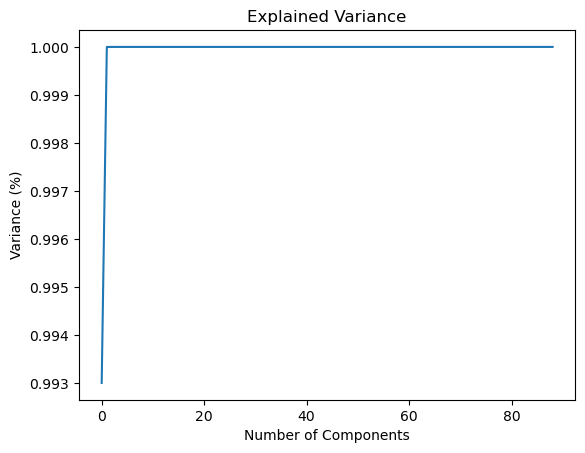

In [131]:
from sklearn.decomposition import PCA

#Initialize the PCA object
pca = PCA()
principalComponents = pca.fit_transform(data3)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel("Variance (%)") #for each component
plt.title("Explained Variance")
plt.show()

In [132]:
print(pca.explained_variance_ratio_[:10])

[9.93010954e-01 6.98804605e-03 8.27931928e-07 1.71819390e-07
 2.78001983e-10 1.03913659e-10 2.06637860e-11 1.52429995e-11
 4.69162461e-12 3.92390110e-12]


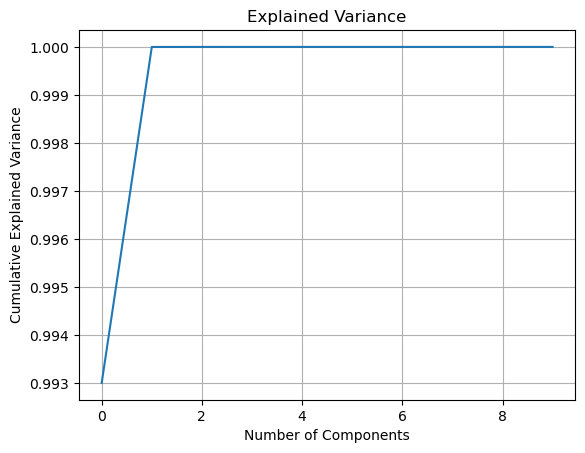

In [133]:
pca = PCA(n_components=10)  # or any small number
pca.fit(data3)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance')
plt.grid(True)
plt.show()


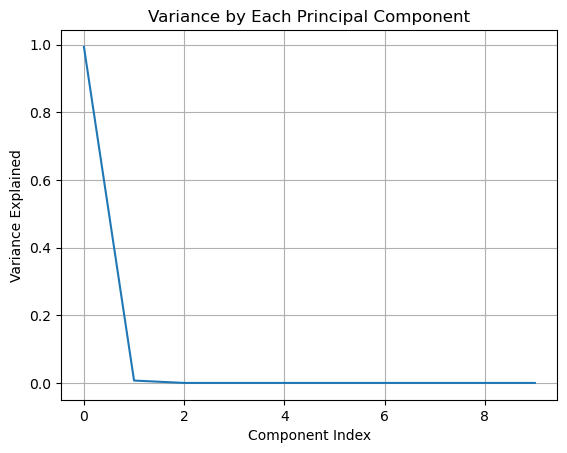

In [134]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component Index')
plt.ylabel('Variance Explained')
plt.title('Variance by Each Principal Component')
plt.grid(True)
plt.show()


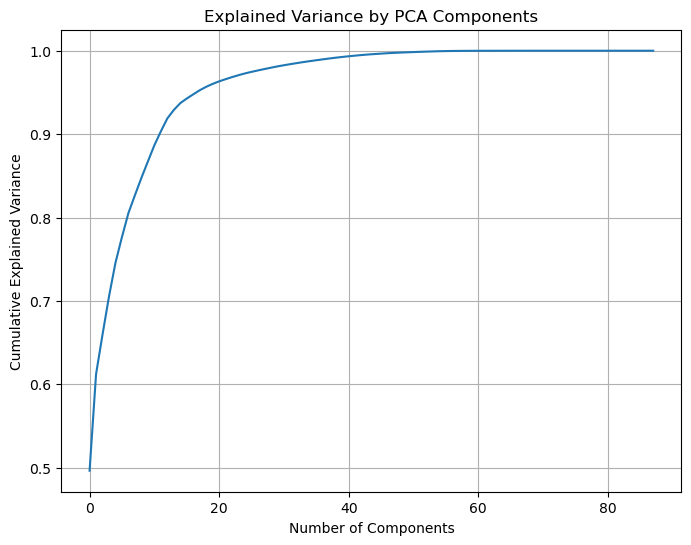

In [135]:
pca = PCA()
principalComponents = pca.fit_transform(scaled_values)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [136]:
pca_95 = PCA(n_components=0.95)
reduced_data = pca_95.fit_transform(scaled_values)

print(f"Reduced shape: {reduced_data.shape}")


Reduced shape: (18278, 18)


In [137]:
# If you just did PCA
reduced_data = pca_95.fit_transform(scaled_values)

# Then create the DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])


In [138]:
# View first 5 rows
print(reduced_df.head())

# Check shape
print(reduced_df.shape)

# Use it for further modeling or visualization


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.346275  1.367016 -0.324551 -0.871771  1.204654 -0.629396  0.059584   
1  2.218464  1.503728 -1.283237 -0.120754  0.451256 -0.247606  0.436570   
2  2.175517  1.578556 -0.894331 -0.454327  0.848810  0.696189  0.018717   
3 -3.558459  0.112850 -1.008162 -0.481562  0.680578  0.199691  0.307358   
4  2.125841  1.456894 -0.802719 -0.295859  0.616694  0.526012  0.171250   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.376804  0.142676 -0.010459  0.121503  0.567906  0.242328  0.337951   
1  0.168639 -0.350572 -0.083444 -0.106105 -0.113954  0.263833  0.366458   
2 -0.253009  0.405437  0.214892 -0.400766 -0.198168 -0.010587  0.444735   
3  0.029889 -0.445346  0.483829 -0.137440  0.092510  0.530278  0.637112   
4 -0.272272  0.121427 -0.260328 -0.379760  0.129664 -0.013016  0.419770   

       PC15      PC16      PC17      PC18  
0 -0.093884  0.356839 -0.434476 -0.792288  
1 -0.33229

In [ ]:
# Done By yesterday

In [360]:
data4 = data3.copy()

In [358]:
from sklearn.model_selection import train_test_split

In [366]:
from sklearn.cluster import KMeans

# Try 3 clusters for Attacker, Midfielder, Defender
kmeans = KMeans(n_clusters=3, random_state=42)
data3['Cluster'] = kmeans.fit_predict(reduced_data)


In [368]:
cluster_summary = data3.groupby('Cluster')[features].mean()
print(cluster_summary)


               age    overall     value_eur      wage_eur  \
Cluster                                                     
0        24.696275  66.451365  2.929669e+06  10494.043131   
1        26.266699  64.796660  1.728016e+06   6667.976424   
2        25.479971  66.409427  2.336736e+06   9332.223494   

         movement_acceleration  movement_sprint_speed  skill_dribbling  \
Cluster                                                                  
0                    72.807269              72.490273        66.852360   
1                    37.688114              37.873281        13.636542   
2                    64.067839              64.467589        56.719488   

         skill_ball_control  
Cluster                      
0                 66.545468  
1                 19.690079  
2                 61.098325  


In [370]:
cluster_map = {0: 'Attacker', 1: 'Midfielder', 2: 'Defender'}  # adjust based on output
data3['Role'] = data3['Cluster'].map(cluster_map)


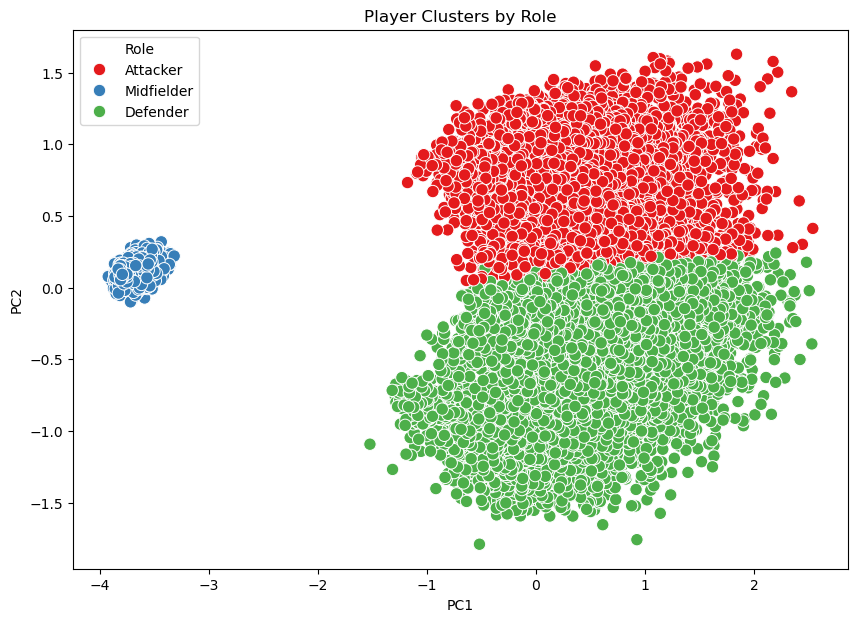

In [404]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(reduced_data)

# Build DataFrame
plot_df = pd.DataFrame(components, columns=['PC1','PC2'])
plot_df['Role'] = data3['Role']

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Role', palette='Set1', s=80)
plt.title('Player Clusters by Role')
plt.show()


Silhouette Score: 0.457


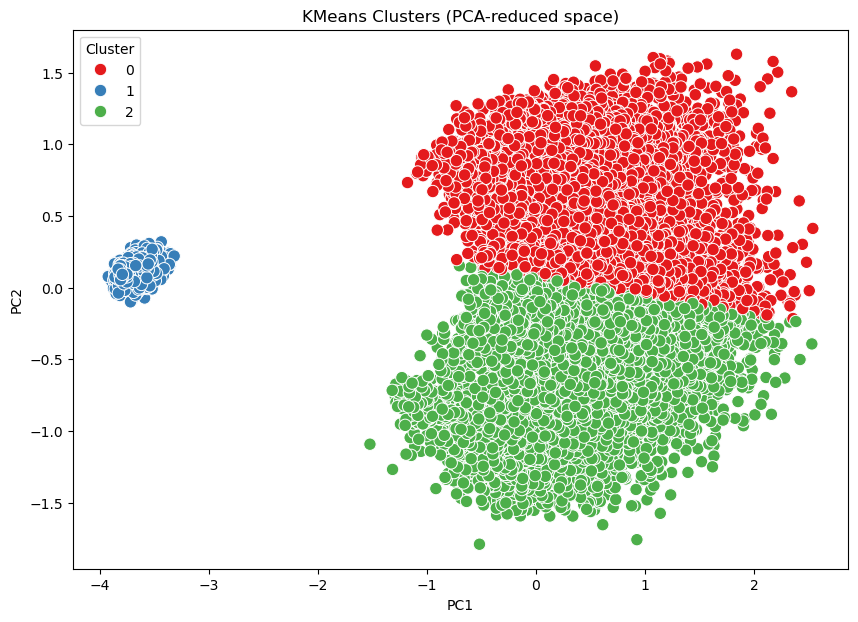

In [406]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(reduced_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
cluster_labels = kmeans.fit_predict(components)

# Calculate Silhouette Score
score = silhouette_score(components, cluster_labels)
print(f'Silhouette Score: {score:.3f}')

# Build DataFrame for plotting
plot_df = pd.DataFrame(components, columns=['PC1','PC2'])
plot_df['Cluster'] = cluster_labels
plot_df['Role'] = data3['Role']  # For visualization only

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=80)
plt.title('KMeans Clusters (PCA-reduced space)')
plt.show()


Silhouette Score (KMeans++): 0.457


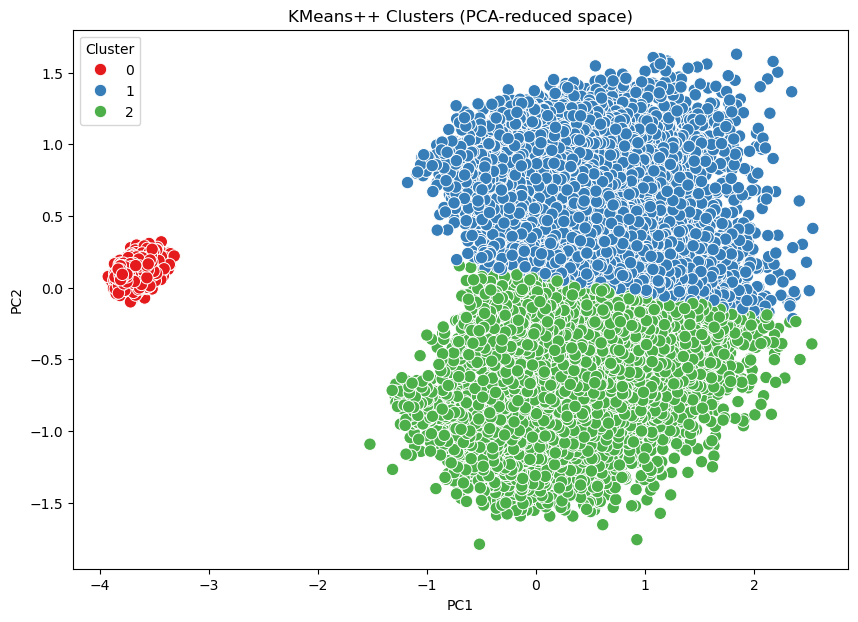

In [400]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_values)

# Apply KMeans++ clustering
kmeans = KMeans(n_clusters=3, init='k-means++')  # no fixed seed
cluster_labels = kmeans.fit_predict(components)

# Calculate Silhouette Score
score = silhouette_score(components, cluster_labels)
print(f'Silhouette Score (KMeans++): {score:.3f}')

# Build DataFrame for plotting
plot_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
plot_df['Cluster'] = cluster_labels
plot_df['Role'] = data3['Role']

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=80)
plt.title('KMeans++ Clusters (PCA-reduced space)')
plt.show()


In [408]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Reduce dimensions first
pca = PCA(n_components=2)
components = pca.fit_transform(reduced_data)

# Compare across multiple random seeds
seeds = range(5)
print("Comparing KMeans++ vs Random Init:\n")

for seed in seeds:
    km_pp = KMeans(n_clusters=3, init='k-means++', random_state=seed)
    km_rand = KMeans(n_clusters=3, init='random', random_state=seed)
    
    labels_pp = km_pp.fit_predict(components)
    labels_rand = km_rand.fit_predict(components)
    
    score_pp = silhouette_score(components, labels_pp)
    score_rand = silhouette_score(components, labels_rand)
    
    print(f"Seed {seed}: KMeans++ Score = {score_pp:.3f} | Random Init Score = {score_rand:.3f}")


Comparing KMeans++ vs Random Init:

Seed 0: KMeans++ Score = 0.459 | Random Init Score = 0.463
Seed 1: KMeans++ Score = 0.457 | Random Init Score = 0.463
Seed 2: KMeans++ Score = 0.463 | Random Init Score = 0.463
Seed 3: KMeans++ Score = 0.463 | Random Init Score = 0.463
Seed 4: KMeans++ Score = 0.457 | Random Init Score = 0.463


In [ ]:
# Done Before

In [139]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


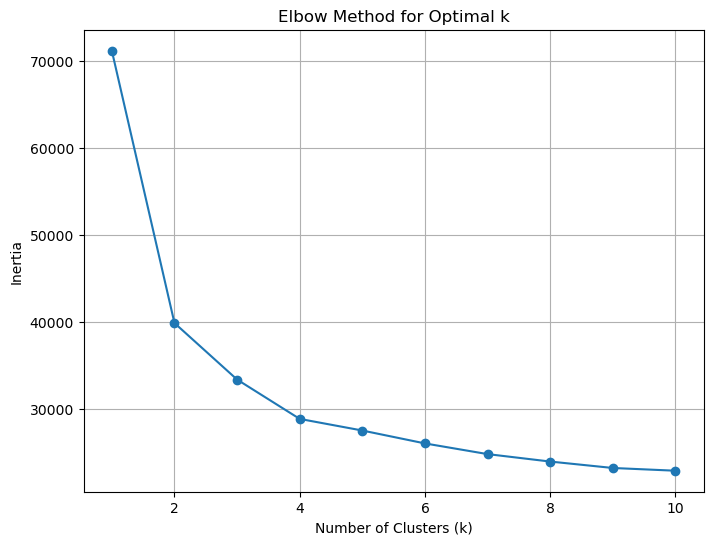

In [140]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [141]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

# Add cluster labels to the dataframe
reduced_df['Cluster'] = clusters


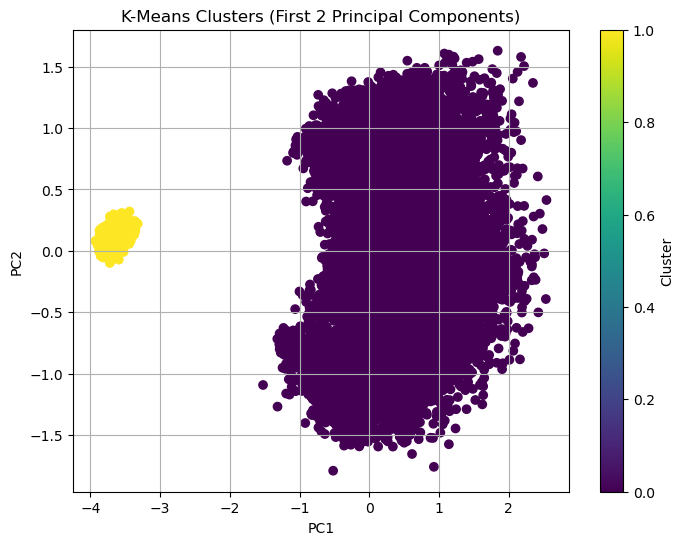

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters (First 2 Principal Components)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [143]:
print(data3.shape)
print(reduced_df.shape)


(18278, 89)
(18278, 19)


In [144]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = reduced_df['Cluster'].values


In [145]:
# Make sure index alignment is correct (reset if needed)
data3 = data3.reset_index(drop=True)
reduced_df = reduced_df.reset_index(drop=True)

# Merge cluster labels back to original DataFrame
df_with_clusters = data3.copy()
df_with_clusters['Cluster'] = reduced_df['Cluster']


In [146]:
# Show 5 players from each cluster
for i in sorted(df_with_clusters['Cluster'].unique()):
    print(f"\nCluster {i} Sample Players:")
    display(df_with_clusters[df_with_clusters['Cluster'] == i][['short_name', 'overall', 'value_eur', 'nationality']].head())



Cluster 0 Sample Players:


short_name  overall  value_eur  nationality
0        9723       94   95500000            5
1        3164       93   58500000          121
2       12658       92  105500000           18
4        4459       91   90000000           12
5        8693       91   90000000           12


Cluster 1 Sample Players:


short_name  overall  value_eur  nationality
3         7851       91   77500000          133
6        11908       90   67500000           57
13        1586       89   58000000           18
14        4173       89   56000000          136
25        4765       88   54500000           18

In [147]:
print(df.columns.tolist())


['age', 'overall', 'value_eur', 'wage_eur', 'movement_acceleration', 'movement_sprint_speed', 'skill_dribbling', 'skill_ball_control']


In [148]:
# Choose from available numeric columns in your dataset
df_with_clusters.groupby('Cluster')[['overall', 'value_eur', 'wage_eur', 'age','nationality']].mean()


overall     value_eur     wage_eur        age  nationality
Cluster                                                              
0        66.426548  2.578808e+06  9806.550917  25.160017    74.726881
1        64.796660  1.728016e+06  6667.976424  26.266699    77.156189

In [149]:
cluster_summary = df_with_clusters.groupby('Cluster')[['overall', 'value_eur', 'wage_eur', 'age','nationality']].mean()
print(cluster_summary)


           overall     value_eur     wage_eur        age  nationality
Cluster                                                              
0        66.426548  2.578808e+06  9806.550917  25.160017    74.726881
1        64.796660  1.728016e+06  6667.976424  26.266699    77.156189


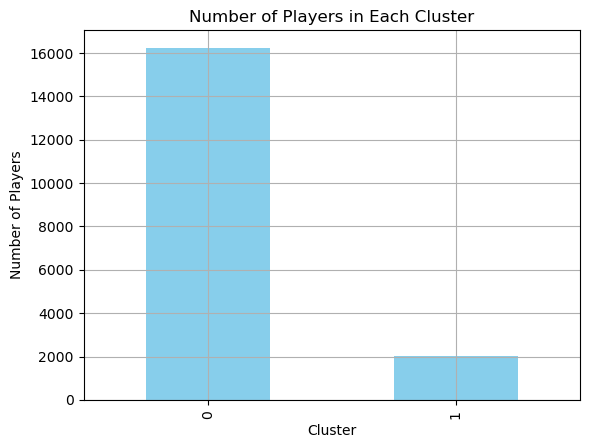

In [150]:
df_with_clusters['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Cluster')
plt.grid(True)
plt.show()


# Evaluation

In [152]:
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_df.drop('Cluster', axis=1), reduced_df['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5454


In [287]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_df.drop('Cluster', axis=1))
    score = silhouette_score(reduced_df.drop('Cluster', axis=1), labels)
    scores.append(score)
    print(f"k={k}, silhouette_score={score:.4f}")


k=2, silhouette_score=0.5454
k=3, silhouette_score=0.2257
k=4, silhouette_score=0.2234
k=5, silhouette_score=0.1822
k=6, silhouette_score=0.1779
k=7, silhouette_score=0.1936
k=8, silhouette_score=0.1886
k=9, silhouette_score=0.1809
k=10, silhouette_score=0.1275


## K Means ++

In [289]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus.fit(principalComponents)

labels_plus = kmeans_plus.labels_
score_plus = silhouette_score(principalComponents, labels_plus)
print("Silhouette Score (KMeans++):", score_plus)


Silhouette Score (KMeans++): 0.20800628274604221
